#### **Project Details**

**Guided Project**

**Due Date:**  23/04/2025

**Contributors:** 
* Kyle Gregory Smith (577999)
* Caitlin Burnett (600330)
* Paul-Dieter Brandt (600948)
* Martinus Christoffel Wolmarans (577963)

## Data-Driven Student Support at BrightPath Academy (TBD)

### 1. Problem Statement
BrightPath Academy is committed to providing a well-rounded education that nurtures both academic excellence and personal growth. However, the school faces several challenges that hinder its ability to fully support every student. Currently, **the absence of real-time insights** means that struggling students may go unnoticed until its too late, if no form of intervention is administered to help them. Additionally, educators **lack targeted support strategies**, making it difficult to personalize academic assistance such as tutoring or mentoring.

While extracurricular activities are encouraged, **there is limited data** on their impact on academic performance, preventing educators from leveraging these programs to enhance student success. Moreover, the school collects vast amounts of student data, but **without a centralized, intuitive platform**, translating this information into actionable insights for student support remains a challenge.

To address these issues, BrightPath Academy is working to implement a **data-driven system** that identifies at-risk students in real time, enables educators to personalize interventions based on student needs, and provides clear insights into the impact of extracurricular involvement. By doing so, the academy **aims to enhance student outcomes, streamline academic support, and foster a more effective learning environment** for all learners.

### 2. Hypotheses
- #### Hypothesis 1: Higher levels of parental support positively influence academic performance.
    - Justification: Bi-variate analysis may reveal a strong correlation between ParentalSupport and GPA, suggesting that students who receive higher parental involvement and support tend to perform better academically.

- #### Hypothesis 2: Students who receive tutoring are more likely to achieve higher grade classifications
    - Justification: The dataset includes information on Tutoring, and bi-variate analysis could show a positive correlation between tutoring and GradeClass, reinforcing the value of structured academic support

- #### Hypothesis 3: Regular study habits are correlated with improved academic performance
    - Justification: A positive correlation between StudyTimeWeekly and GPA might suggest that students who allocate more time to studying each week achieve higher grades

- #### Hypothesis 4: Participation in extracurricular activities influences academic performance
    - Justification: Univariate and bi-variate analysis of Extracurricular and GradeClass may help determine whether students engaged in extracurricular activities perform better academically compared to those who do not

- #### Hypothesis 5: Frequent absences negatively affect student academic outcomes
    - Justification: A negative correlation between Absences and GPA could indicate that students with higher absence rates tend to have lower academic performance due to missing valuable learning time

### 3. Importing Libraries & Data

In [40]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import os
import xgboost as xgb
import joblib
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway, kruskal, chi2_contingency

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Input, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.losses import Loss




#Import csv files
df_original = pd.read_csv('../data/Student_performance_data.csv')               #.. goes up in the directory
df_original_cleaned = df_original.copy()                                           #Use throughout 

### 4. Understanding the data

#### Data Attributes:

In [2]:
#Looking at a data smample
df_original_cleaned.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
#dataset shape and datatypes
df_original_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
#Dataset statistics
df_original_cleaned.describe().T 

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


We loaded the dataset and explored the basic structure:

- The dataset has 2392 rows and 15 columns.
- The columns include categorical variables such as `gender`, `course`, etc.
- Some values may need cleaning or encoding (e.g., converting Yes/No to 1/0).
- Column names are suitable, no need to standardize.
# Insights from the Data

### 1. **Gender:**
- **Mean**: 0.51, which suggests that approximately 51% of the students are male (represented by 0) and 49% are female (represented by 1). This distribution is fairly balanced.
- **Range**: The values range from 0 to 1, which is expected for a binary feature.
- **Outliers**: No outliers were detected, as this is a binary variable with values strictly between 0 and 1.

### 2. **Ethnicity:**
- **Mean**: 0.88, indicating that most students belong to ethnic groups coded as 0, 1, or 2. The relatively high mean suggests the predominance of certain ethnic groups in the dataset.
- **Standard Deviation**: 1.03, which implies some variability in ethnicity, though this could be affected by an imbalance in group distribution.
- **Outliers/Concerns**: Since Ethnicity is a categorical variable with values ranging from 0 to 3, any values outside of this range should be examined for possible data entry errors.

### 3. **Parental Education:**
- **Mean**: 1.75, indicating that most students' parents have a high school education or some college education.
- **Standard Deviation**: 1.00, showing a significant amount of variability. Some students have parents with higher education levels (e.g., bachelor's or graduate degrees).
- **Outliers**: The maximum value of 4 suggests that a subset of students' parents have advanced degrees. Although these values fall within the expected range, the variability could indicate that some students come from more privileged socio-economic backgrounds. Outliers should be examined to ensure proper encoding.

### 4. **Study Time Weekly:**
- **Mean**: 9.77 hours, with a **Standard Deviation** of 5.65, indicating considerable variation in weekly study time.
- **Range**: Study time ranges from just over 1 hour to nearly 20 hours per week, which highlights diverse study habits across students.
- **Outliers**: Extreme values may represent highly dedicated students or those with poor engagement. These values should be analyzed further, especially in relation to academic performance.

### 5. **Absences:**
- **Mean**: 14.54 absences, showing a significant number of missed school days across the population.
- **Standard Deviation**: 8.46, indicating substantial variation in absenteeism. Some students have very few absences, while others have much higher numbers.
- **Range**: Absences range from 0 to 29, and the higher number of absences may indicate disengagement or external challenges affecting attendance, which could impact academic performance.

### 6. **Tutoring:**
- **Mean**: 0.30, meaning that about 30% of students receive tutoring, which may help improve their academic performance.
- **Outliers**: As a binary variable (0 = No, 1 = Yes), there are no outliers, but it’s essential to ensure proper coding for those receiving tutoring.

### 7. **Parental Support:**
- **Mean**: 2.12, suggesting a moderate to high level of parental support on average.
- **Range**: The values range from 0 to 4, with 2 being the median. This indicates that most students receive a moderate level of parental support.
- **Outliers**: There do not appear to be extreme values, but it may be useful to investigate whether a significant portion of students receives lower parental support and how that relates to their academic performance.

### 8. **Extracurricular Activities:**
- **Mean**: 0.38, indicating that 38% of students participate in extracurricular activities.
- **Standard Deviation**: 0.49, reflecting variability in participation. A large portion of students is not involved in extracurricular activities.
- **Outliers**: As a binary feature (0 = No, 1 = Yes), outliers are not expected unless there are data encoding errors.

### 9. **Sports:**
- **Mean**: 0.30, meaning that 30% of students engage in sports.
- **Outliers**: As with other binary features, no outliers are expected unless there is a mistake in encoding.

### 10. **Music:**
- **Mean**: 0.20, suggesting that around 20% of students participate in music-related activities.
- **Standard Deviation**: 0.40, indicating moderate variability in participation.
- **Outliers**: As with other binary features, potential outliers would be values outside the expected [0, 1] range, which should be checked for errors.

---

## Concerns & Considerations:

- **Data Range**:
    - Features like **StudyTimeWeekly**, **Absences**, and **ParentalEducation** exhibit wide ranges. For example, some students report studying over 20 hours per week or have as many as 30 absences. These extreme values may skew the analysis, so they should be carefully examined, and potential outlier treatment strategies (like binning or normalization) should be considered.

- **Binary Features**:
    - Features like **Tutoring**, **Extracurricular**, **Sports**, and **Music** are binary (0 or 1). Outliers are not expected in these features, but it’s crucial to ensure that all values are correctly encoded (e.g., values should strictly be 0 or 1).

- **Parental Education**:
    - The **ParentalEducation** feature shows considerable variability, with the highest value being 4, indicating that some students have parents with advanced degrees. Given the potential impact of parental education on students' academic performance, it’s important to check for correct encoding and unexpected values.

- **Extracurricular Activities**:
    - The relatively low participation rate (38%) in extracurricular activities could be significant. It might indicate a lack of resources at school, or it could be that students prioritize academic work over extracurricular engagement.




### 5. Exploring the Data

#### A. Univariate Analysis:
Univariate analysis involves examining one variable at a time from the dataset. This helps us understand the distribution, central tendency (mean, median, mode), spread (standard deviation, range), and any patterns or anomalies present within a single feature

Summary Statistics for Numerical Variables:
       StudyTimeWeekly     Absences
count      2392.000000  2392.000000
mean          9.771992    14.541388
std           5.652774     8.467417
min           0.001057     0.000000
25%           5.043079     7.000000
50%           9.705363    15.000000
75%          14.408410    22.000000
max          19.978094    29.000000


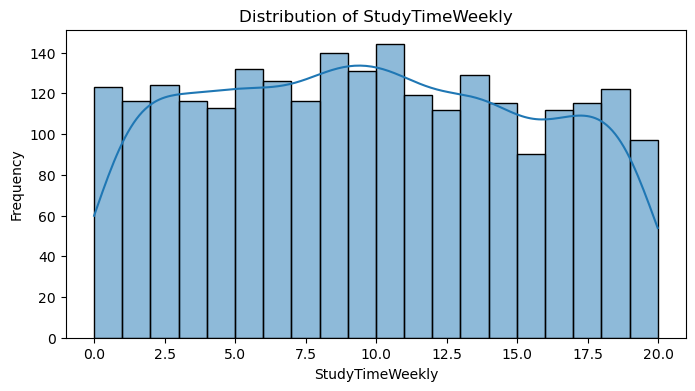

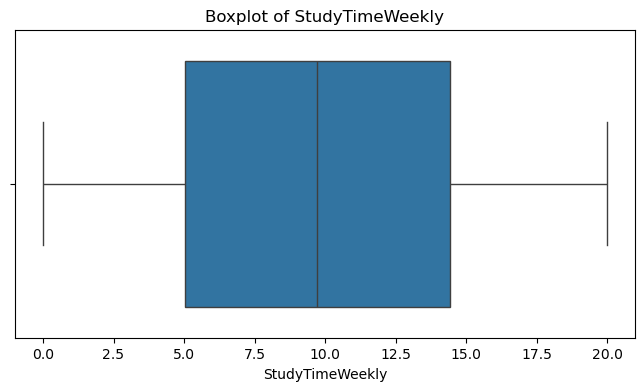

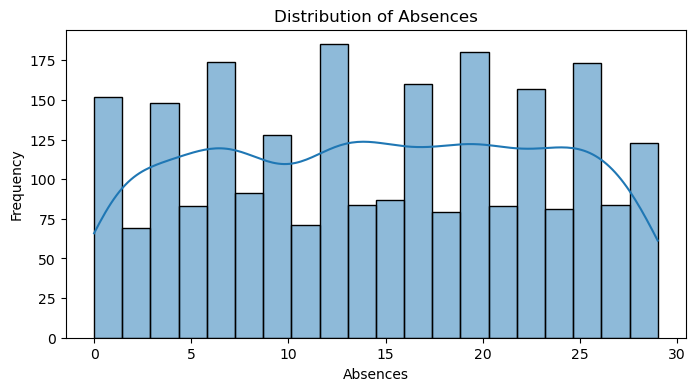

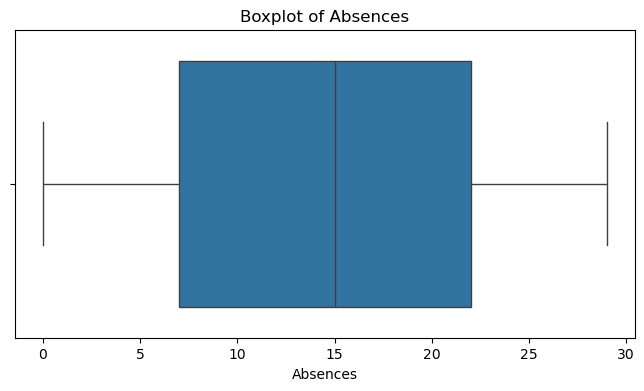


Frequency Counts for Categorical Variables:

Gender Frequency Counts:
Gender
1    1222
0    1170
Name: count, dtype: int64


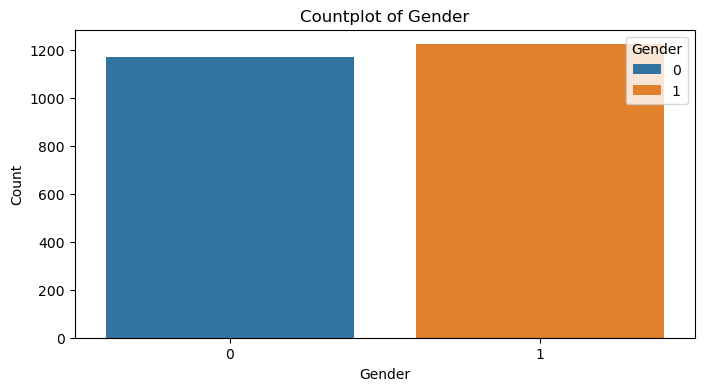


Ethnicity Frequency Counts:
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64


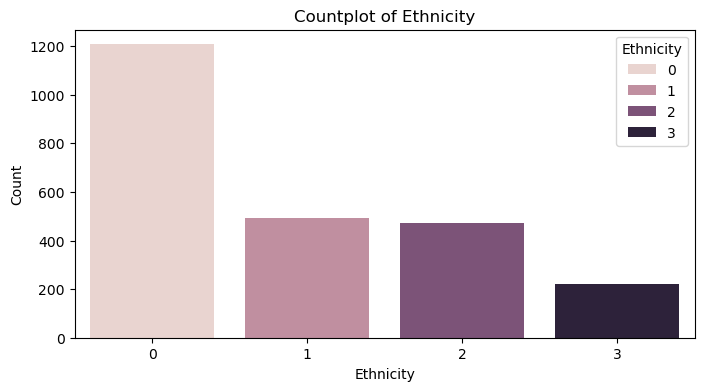


ParentalEducation Frequency Counts:
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64


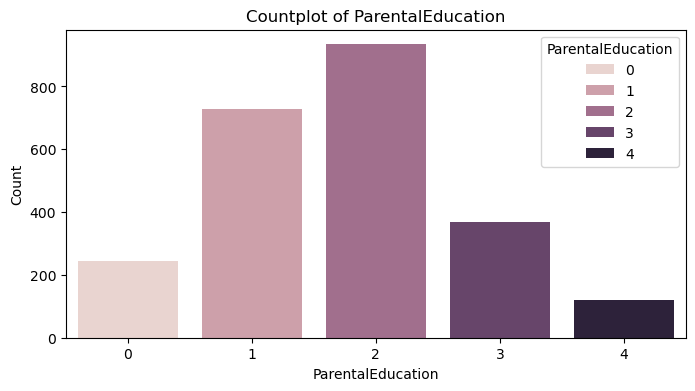


Tutoring Frequency Counts:
Tutoring
0    1671
1     721
Name: count, dtype: int64


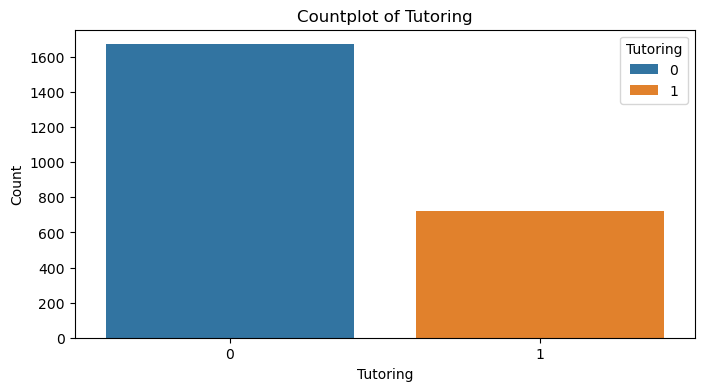


Extracurricular Frequency Counts:
Extracurricular
0    1475
1     917
Name: count, dtype: int64


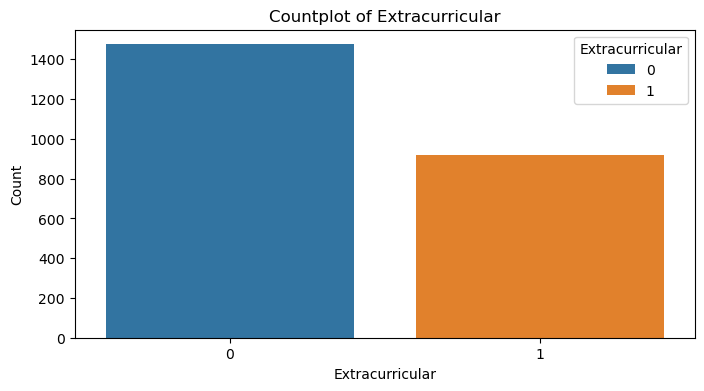


Sports Frequency Counts:
Sports
0    1666
1     726
Name: count, dtype: int64


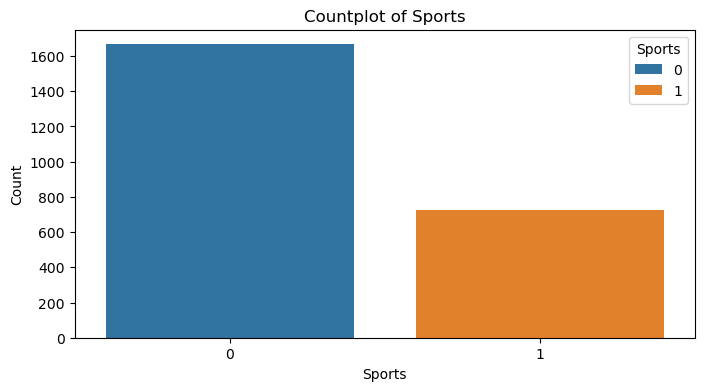


Music Frequency Counts:
Music
0    1921
1     471
Name: count, dtype: int64


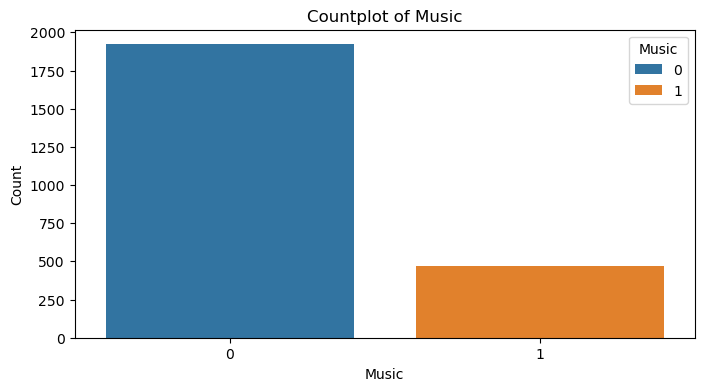


Volunteering Frequency Counts:
Volunteering
0    2016
1     376
Name: count, dtype: int64


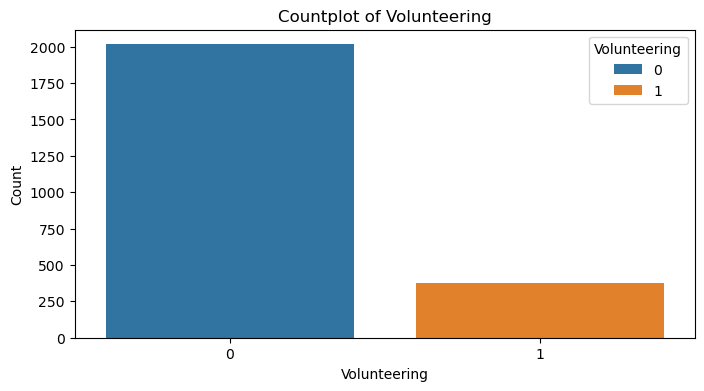


GradeClass Frequency Counts:
GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


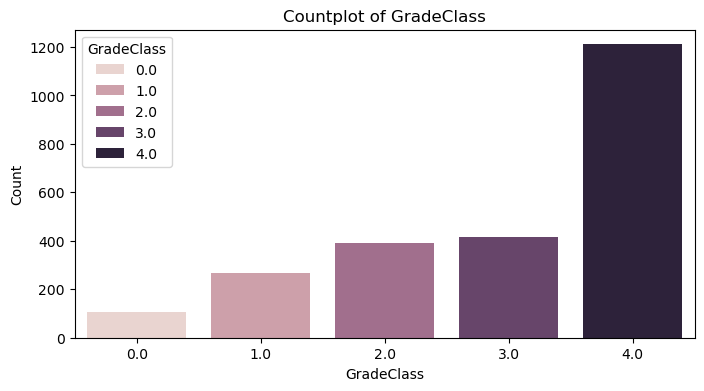

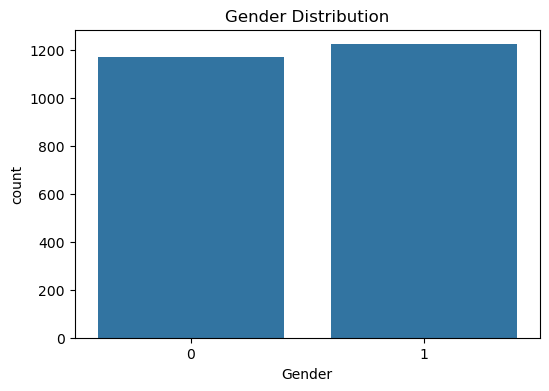

In [5]:
# 1. Numerical Variables (Summary Statistics and Visualizations)
numerical_columns = ['StudyTimeWeekly', 'Absences']

# Summary Statistics for numerical columns
print("Summary Statistics for Numerical Variables:")
print(df_original_cleaned[numerical_columns].describe())

# Visualizations for numerical features
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_original_cleaned[column], kde=True, bins=20)  # Histogram with a KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to check for outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_original_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()




# 2. Categorical Variables (Frequency Counts and Visualizations)
categorical_columns = [
    'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
    'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass'
]

# Frequency counts for categorical variables
print("\nFrequency Counts for Categorical Variables:")
for column in categorical_columns:
    print(f'\n{column} Frequency Counts:')
    print(df_original_cleaned[column].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_original_cleaned[column], hue=df_original_cleaned[column])
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


#Visualizing the gender distribution
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data=df_original_cleaned)
plt.title('Gender Distribution')
plt.show()

# Univariate Analysis Insights

---

## Summary Statistics for Numerical Variables

| Feature           | Mean  | Std Dev | Min    | 25%    | 50%    | 75%    | Max    |
|------------------|-------|---------|--------|--------|--------|--------|--------|
| StudyTimeWeekly  | 9.77  | 5.65    | 0.00   | 5.04   | 9.71   | 14.41  | 19.98  |
| Absences         | 14.54 | 8.47    | 0.00   | 7.00   | 15.00  | 22.00  | 29.00  |

- **Study Time** and **Absences** show relatively normal distributions.
- High variance indicates differing levels of study habits and school attendance.

---

## Frequency Counts for Categorical Variables

### Gender

| Value | Label  | Count |
|-------|--------|-------|
| 0     | Male   | 1170  |
| 1     | Female | 1222  |

- Gender distribution is fairly balanced.

---

### Ethnicity

| Code | Group            | Count |
|------|------------------|-------|
| 0    | Caucasian        | 1207  |
| 1    | African American | 493   |
| 2    | Asian            | 470   |
| 3    | Other            | 222   |

- **Caucasians** are overrepresented, while other groups are less prominent.

---

### Parental Education

| Code | Education Level | Count |
|------|------------------|-------|
| 0    | None             | 243   |
| 1    | High School      | 728   |
| 2    | Some College     | 934   |
| 3    | Bachelor's       | 367   |
| 4    | Higher Study     | 120   |

- Most students' parents have **some college or high school** education.

---

### Tutoring

| Value | Status | Count |
|-------|--------|-------|
| 0     | No     | 1671  |
| 1     | Yes    | 721   |

- Most students **do not receive tutoring**.

---

### Extracurricular Activities

| Value | Status | Count |
|-------|--------|-------|
| 0     | No     | 1475  |
| 1     | Yes    | 917   |

- Participation in extracurriculars is **below 50%**.

---

### Sports Participation

| Value | Status | Count |
|-------|--------|-------|
| 0     | No     | 1666  |
| 1     | Yes    | 726   |

- **Majority** of students are not engaged in sports.

---

### Music Participation

| Value | Status | Count |
|-------|--------|-------|
| 0     | No     | 1921  |
| 1     | Yes    | 471   |

- Only **about 20%** of students are involved in music activities.

---

### Volunteering

| Value | Status | Count |
|-------|--------|-------|
| 0     | No     | 2016  |
| 1     | Yes    | 376   |

- **Volunteering participation is low** — under 16%.

---

### Grade Class (Target Variable)

| Code | Grade | Count |
|------|--------|-------|
| 0.0  | A      | 107   |
| 1.0  | B      | 269   |
| 2.0  | C      | 391   |
| 3.0  | D      | 414   |
| 4.0  | F      | 1211  |

- The distribution is **heavily skewed toward failing grades (F)**.
- **Over 50%** of the students fall into the **lowest academic category**.
- High-performing students (A/B) are relatively rare.

---


#### B. Bi-variate Analysis:
Bivariate analysis examines the relationship between two variables from the dataset — typically an independent (input) variable and a dependent (output) variable. This helps in identifying trends, correlations, and how input features may impact the target outcome



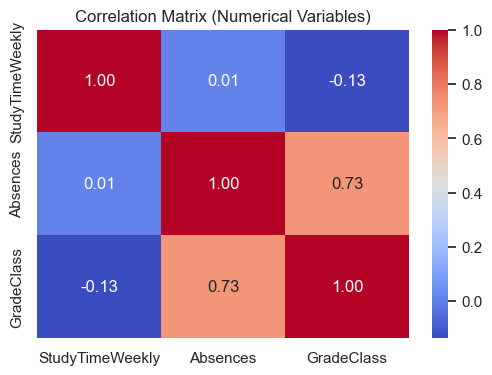


--- Correlation Insights ---
The correlation between StudyTimeWeekly and StudyTimeWeekly is strong positive (1.00). This suggests a direct relationship between these two variables.
The correlation between Absences and StudyTimeWeekly is weak (0.01). There's a weak or no significant relationship between these variables.
The correlation between GradeClass and StudyTimeWeekly is weak (-0.13). There's a weak or no significant relationship between these variables.
The correlation between StudyTimeWeekly and Absences is weak (0.01). There's a weak or no significant relationship between these variables.
The correlation between Absences and Absences is strong positive (1.00). This suggests a direct relationship between these two variables.
The correlation between GradeClass and Absences is strong positive (0.73). This suggests a direct relationship between these two variables.
The correlation between StudyTimeWeekly and GradeClass is weak (-0.13). There's a weak or no significant relationship

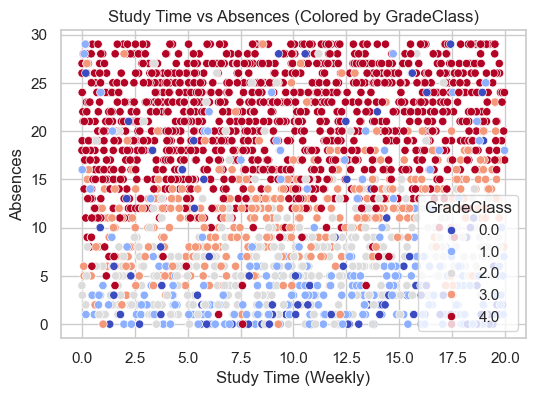

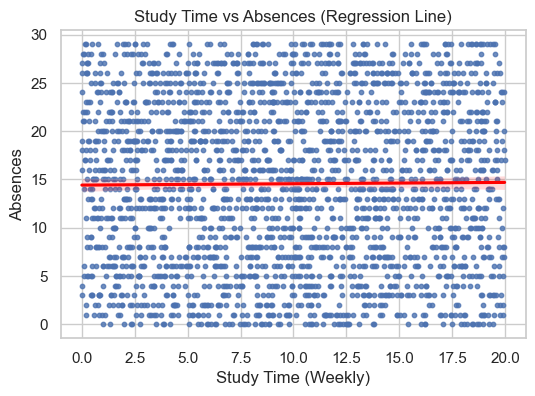

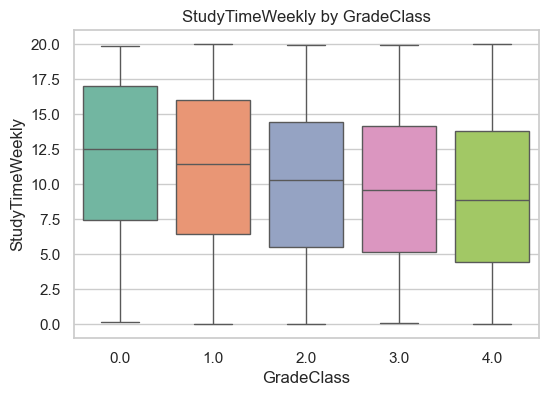


ANOVA test for StudyTimeWeekly by GradeClass: p-value = 0.0000
There's a significant difference in StudyTimeWeekly across GradeClass categories (p-value < 0.05).


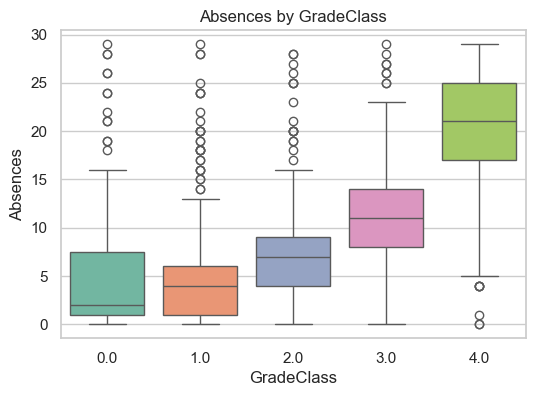


ANOVA test for Absences by GradeClass: p-value = 0.0000
There's a significant difference in Absences across GradeClass categories (p-value < 0.05).


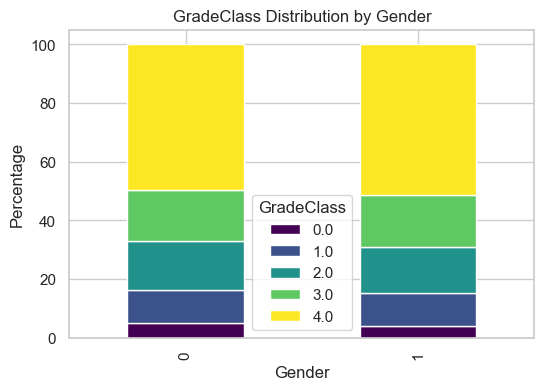


Chi-square test for Gender vs GradeClass: p-value = 0.7513
There's no significant association between Gender and GradeClass (p-value >= 0.05).


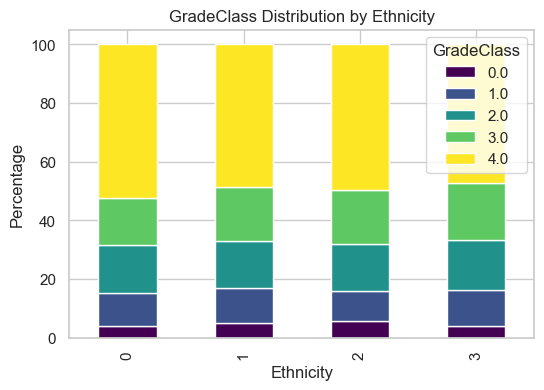


Chi-square test for Ethnicity vs GradeClass: p-value = 0.7914
There's no significant association between Ethnicity and GradeClass (p-value >= 0.05).


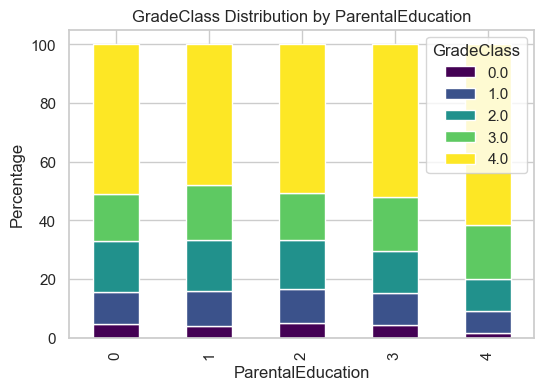


Chi-square test for ParentalEducation vs GradeClass: p-value = 0.5333
There's no significant association between ParentalEducation and GradeClass (p-value >= 0.05).


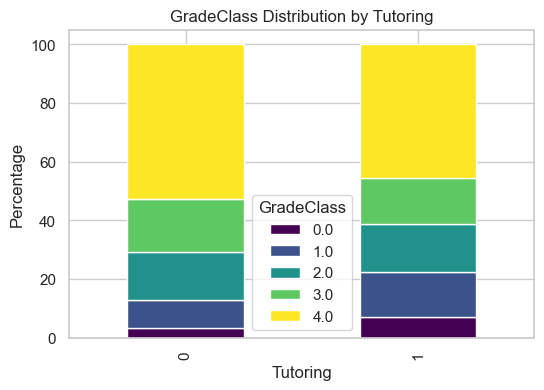


Chi-square test for Tutoring vs GradeClass: p-value = 0.0000
There's a significant association between Tutoring and GradeClass (p-value < 0.05).


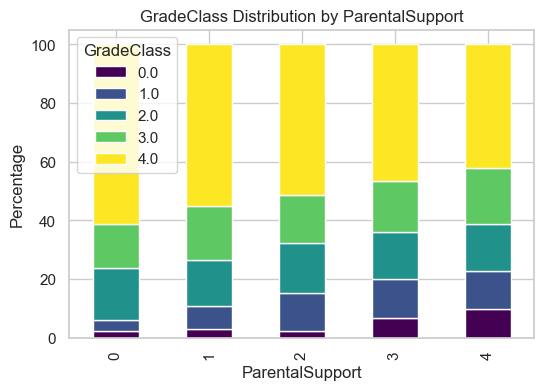


Chi-square test for ParentalSupport vs GradeClass: p-value = 0.0000
There's a significant association between ParentalSupport and GradeClass (p-value < 0.05).


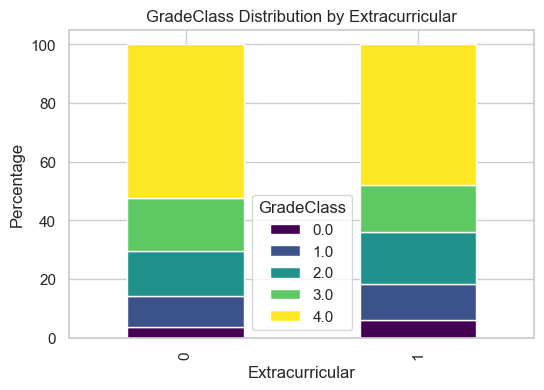


Chi-square test for Extracurricular vs GradeClass: p-value = 0.0066
There's a significant association between Extracurricular and GradeClass (p-value < 0.05).


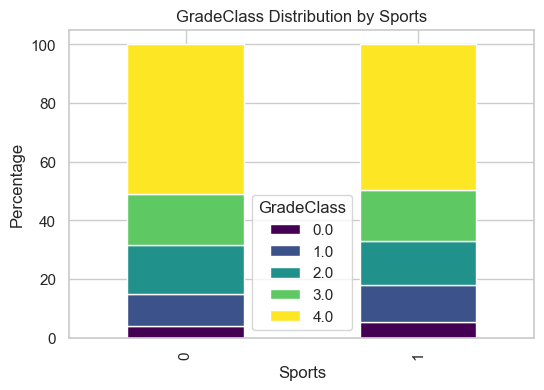


Chi-square test for Sports vs GradeClass: p-value = 0.3583
There's no significant association between Sports and GradeClass (p-value >= 0.05).


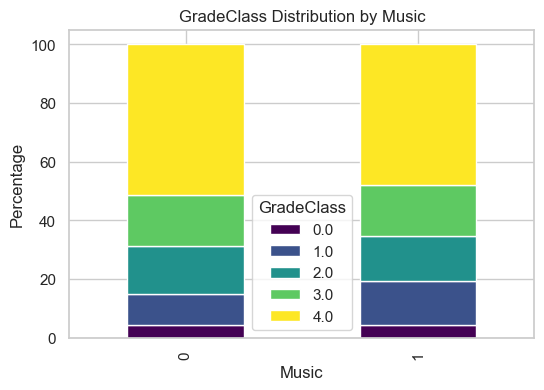


Chi-square test for Music vs GradeClass: p-value = 0.0956
There's no significant association between Music and GradeClass (p-value >= 0.05).


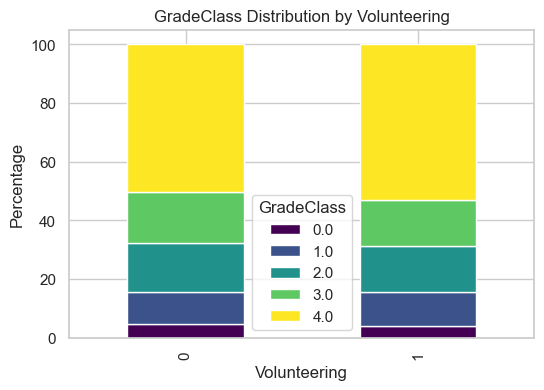


Chi-square test for Volunteering vs GradeClass: p-value = 0.8297
There's no significant association between Volunteering and GradeClass (p-value >= 0.05).


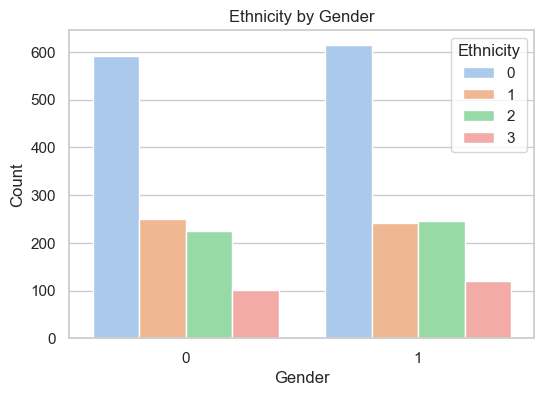


Chi-square test for Gender vs Ethnicity: p-value = 0.6185
There's no significant association between Gender and Ethnicity (p-value >= 0.05).


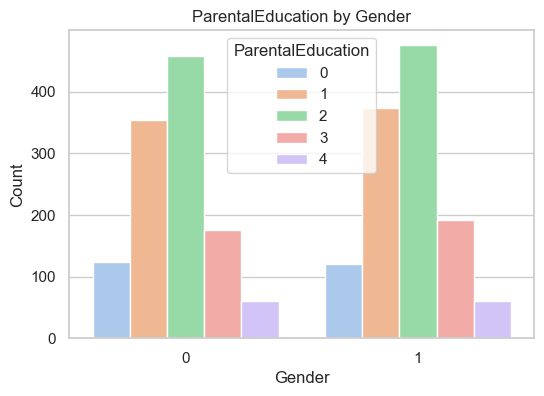


Chi-square test for Gender vs ParentalEducation: p-value = 0.9641
There's no significant association between Gender and ParentalEducation (p-value >= 0.05).


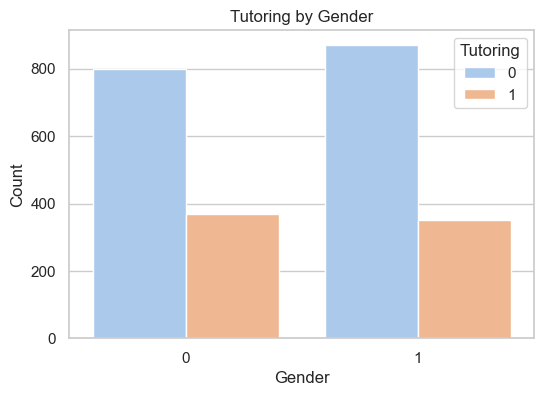


Chi-square test for Gender vs Tutoring: p-value = 0.1334
There's no significant association between Gender and Tutoring (p-value >= 0.05).


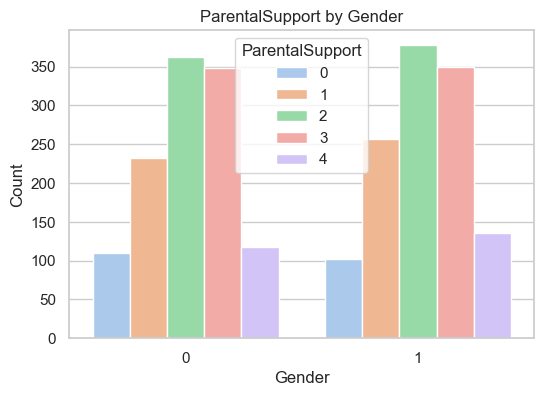


Chi-square test for Gender vs ParentalSupport: p-value = 0.7222
There's no significant association between Gender and ParentalSupport (p-value >= 0.05).


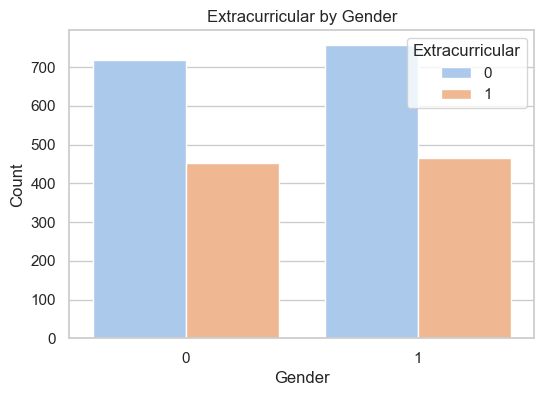


Chi-square test for Gender vs Extracurricular: p-value = 0.8029
There's no significant association between Gender and Extracurricular (p-value >= 0.05).


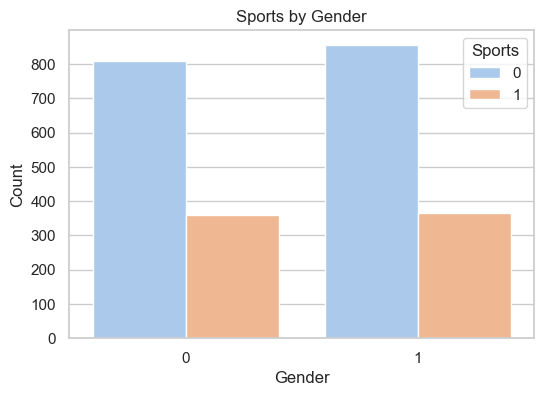


Chi-square test for Gender vs Sports: p-value = 0.6960
There's no significant association between Gender and Sports (p-value >= 0.05).


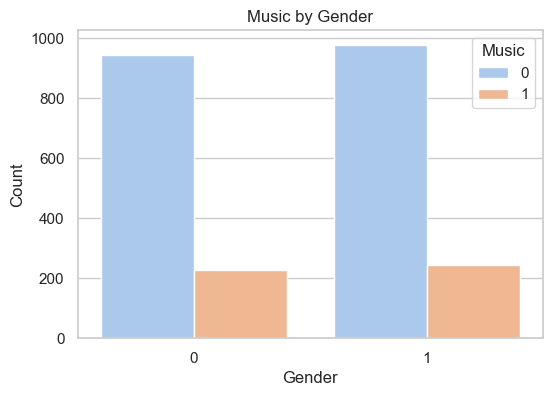


Chi-square test for Gender vs Music: p-value = 0.7670
There's no significant association between Gender and Music (p-value >= 0.05).


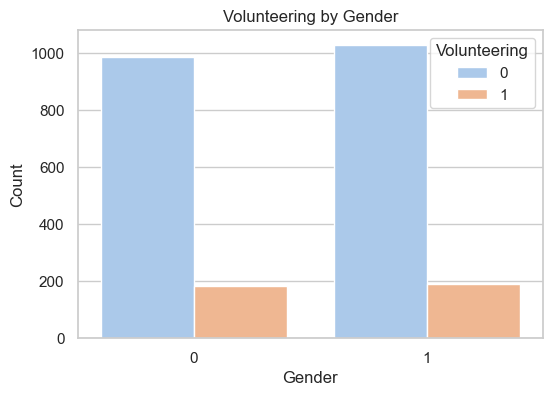


Chi-square test for Gender vs Volunteering: p-value = 1.0000
There's no significant association between Gender and Volunteering (p-value >= 0.05).


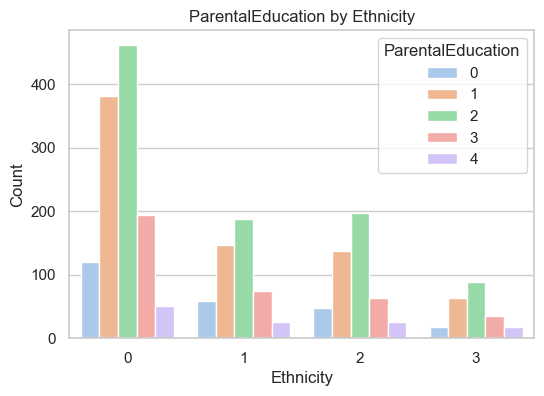


Chi-square test for Ethnicity vs ParentalEducation: p-value = 0.3395
There's no significant association between Ethnicity and ParentalEducation (p-value >= 0.05).


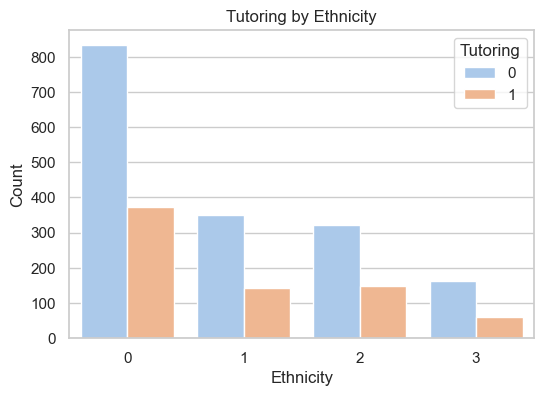


Chi-square test for Ethnicity vs Tutoring: p-value = 0.4975
There's no significant association between Ethnicity and Tutoring (p-value >= 0.05).


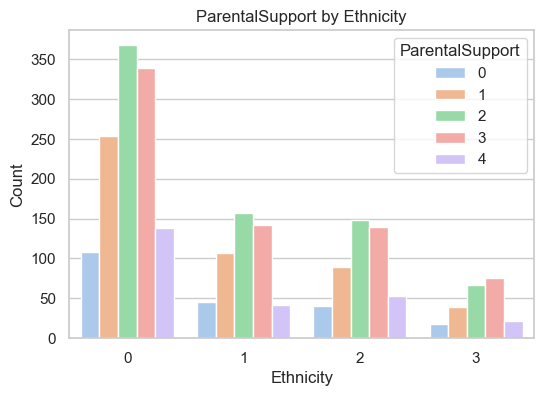


Chi-square test for Ethnicity vs ParentalSupport: p-value = 0.7292
There's no significant association between Ethnicity and ParentalSupport (p-value >= 0.05).


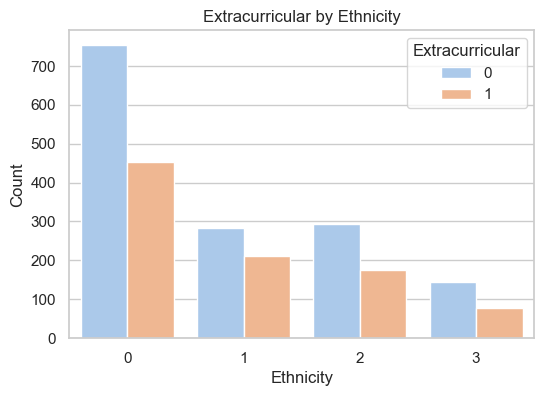


Chi-square test for Ethnicity vs Extracurricular: p-value = 0.1169
There's no significant association between Ethnicity and Extracurricular (p-value >= 0.05).


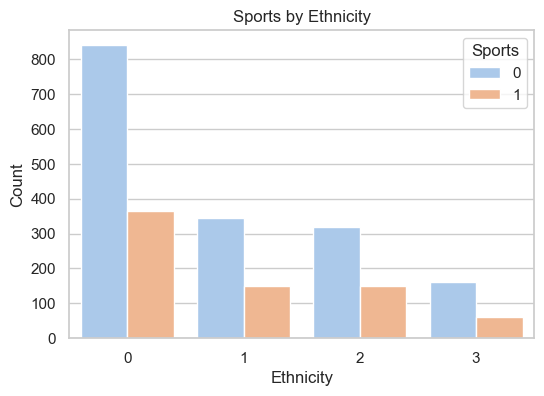


Chi-square test for Ethnicity vs Sports: p-value = 0.7020
There's no significant association between Ethnicity and Sports (p-value >= 0.05).


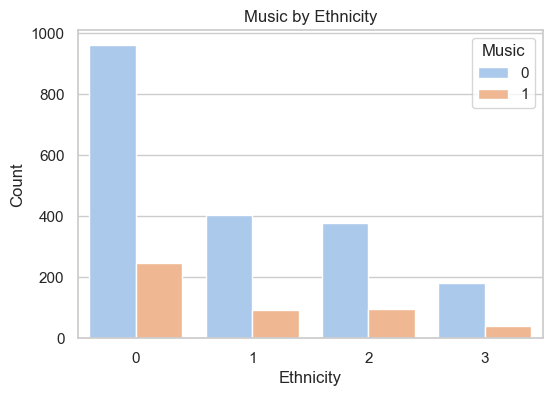


Chi-square test for Ethnicity vs Music: p-value = 0.7390
There's no significant association between Ethnicity and Music (p-value >= 0.05).


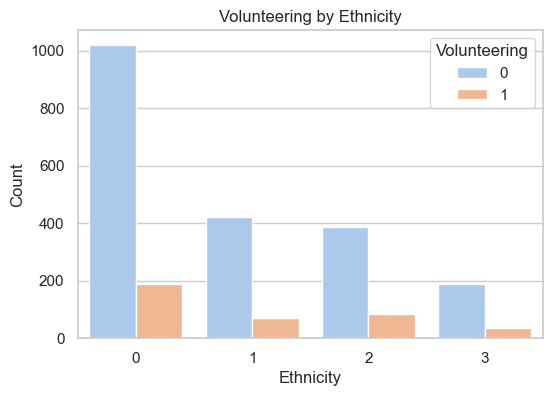


Chi-square test for Ethnicity vs Volunteering: p-value = 0.5665
There's no significant association between Ethnicity and Volunteering (p-value >= 0.05).


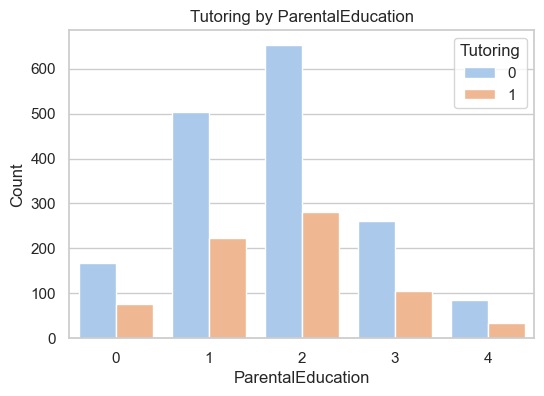


Chi-square test for ParentalEducation vs Tutoring: p-value = 0.9452
There's no significant association between ParentalEducation and Tutoring (p-value >= 0.05).


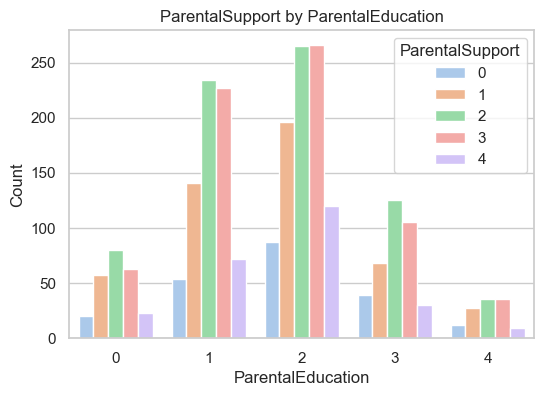


Chi-square test for ParentalEducation vs ParentalSupport: p-value = 0.2124
There's no significant association between ParentalEducation and ParentalSupport (p-value >= 0.05).


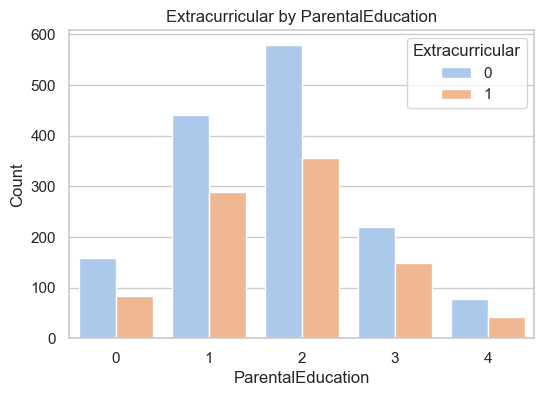


Chi-square test for ParentalEducation vs Extracurricular: p-value = 0.5340
There's no significant association between ParentalEducation and Extracurricular (p-value >= 0.05).


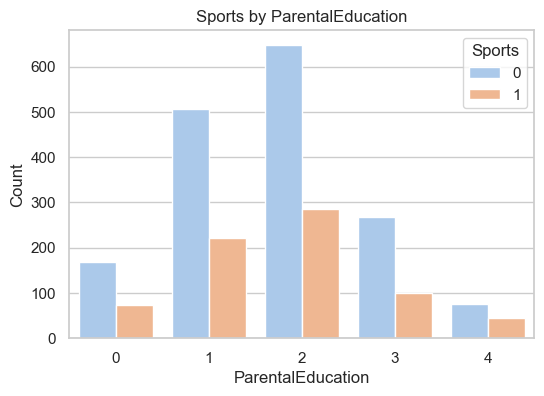


Chi-square test for ParentalEducation vs Sports: p-value = 0.4092
There's no significant association between ParentalEducation and Sports (p-value >= 0.05).


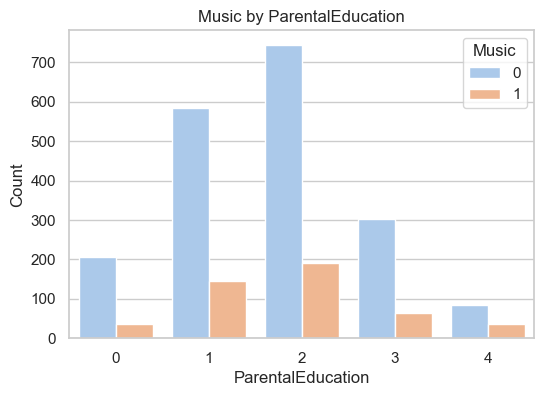


Chi-square test for ParentalEducation vs Music: p-value = 0.0201
There's a significant association between ParentalEducation and Music (p-value < 0.05).


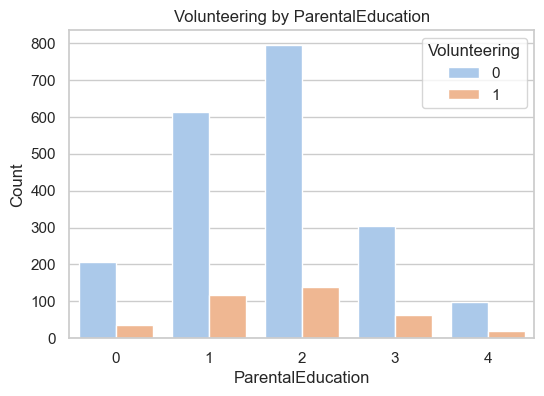


Chi-square test for ParentalEducation vs Volunteering: p-value = 0.8388
There's no significant association between ParentalEducation and Volunteering (p-value >= 0.05).


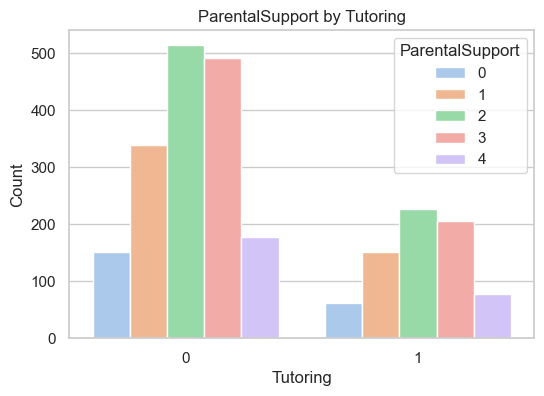


Chi-square test for Tutoring vs ParentalSupport: p-value = 0.9746
There's no significant association between Tutoring and ParentalSupport (p-value >= 0.05).


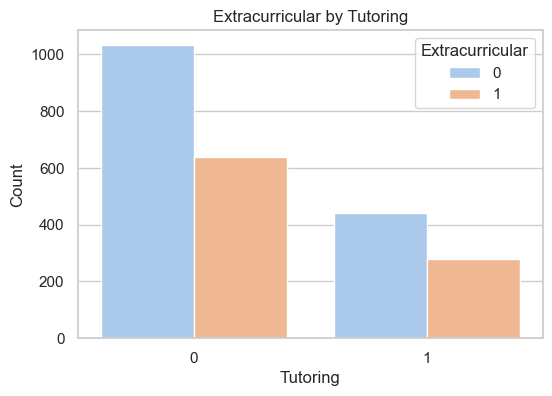


Chi-square test for Tutoring vs Extracurricular: p-value = 0.8476
There's no significant association between Tutoring and Extracurricular (p-value >= 0.05).


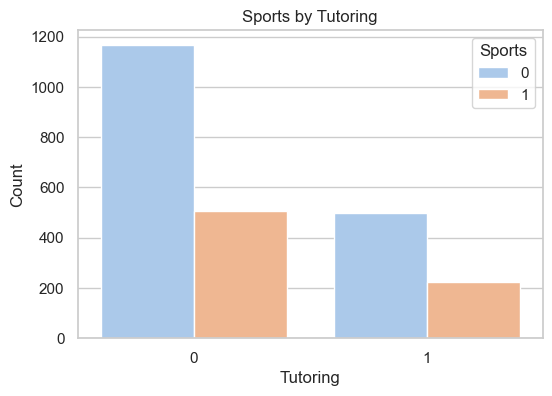


Chi-square test for Tutoring vs Sports: p-value = 0.7960
There's no significant association between Tutoring and Sports (p-value >= 0.05).


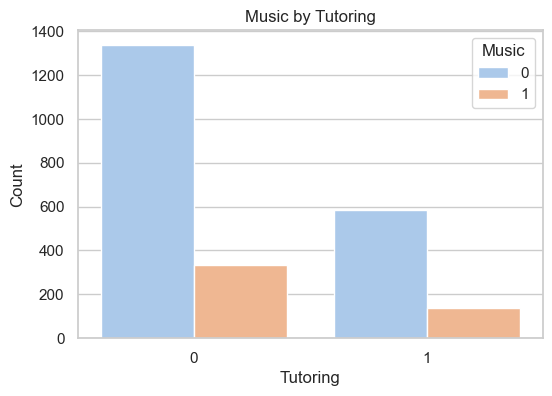


Chi-square test for Tutoring vs Music: p-value = 0.6165
There's no significant association between Tutoring and Music (p-value >= 0.05).


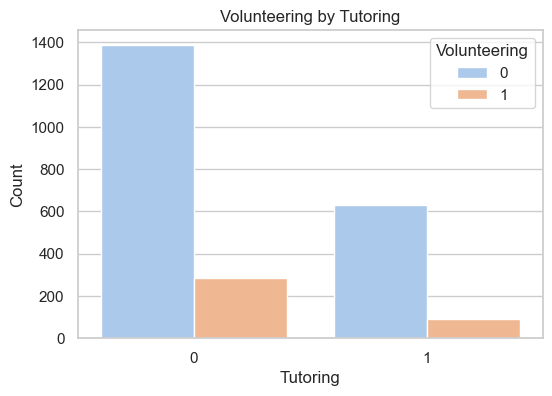


Chi-square test for Tutoring vs Volunteering: p-value = 0.0152
There's a significant association between Tutoring and Volunteering (p-value < 0.05).


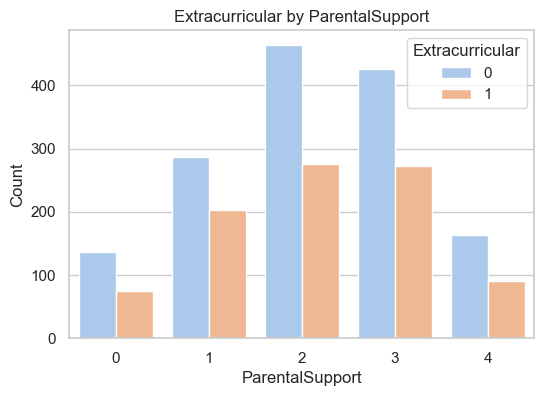


Chi-square test for ParentalSupport vs Extracurricular: p-value = 0.4023
There's no significant association between ParentalSupport and Extracurricular (p-value >= 0.05).


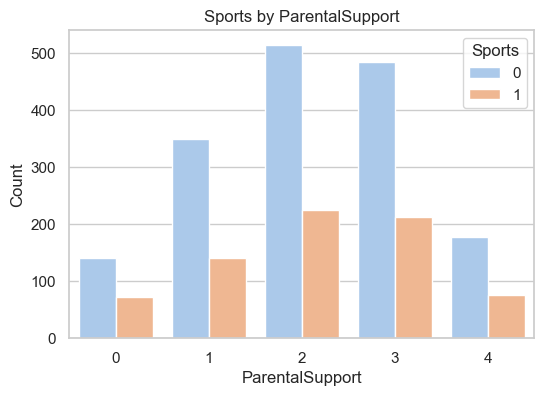


Chi-square test for ParentalSupport vs Sports: p-value = 0.7301
There's no significant association between ParentalSupport and Sports (p-value >= 0.05).


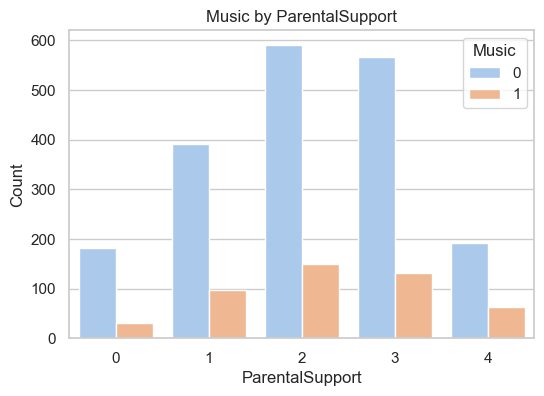


Chi-square test for ParentalSupport vs Music: p-value = 0.1115
There's no significant association between ParentalSupport and Music (p-value >= 0.05).


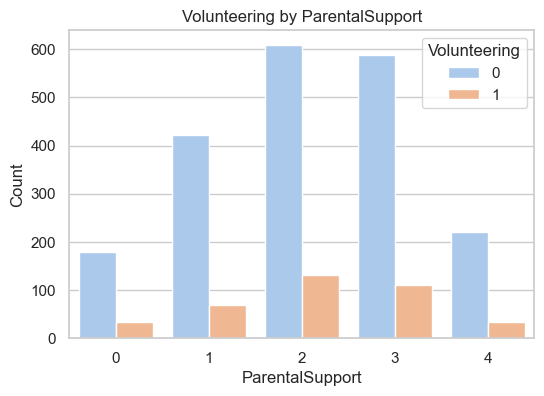


Chi-square test for ParentalSupport vs Volunteering: p-value = 0.3025
There's no significant association between ParentalSupport and Volunteering (p-value >= 0.05).


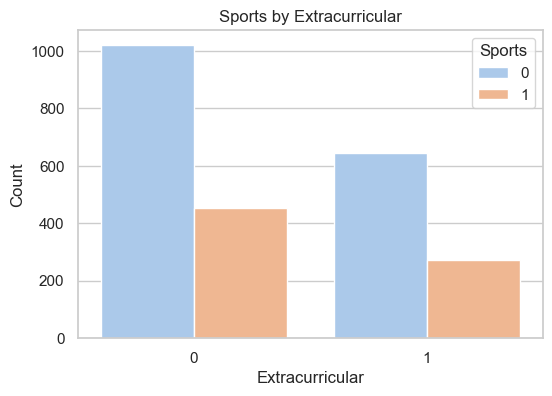


Chi-square test for Extracurricular vs Sports: p-value = 0.5945
There's no significant association between Extracurricular and Sports (p-value >= 0.05).


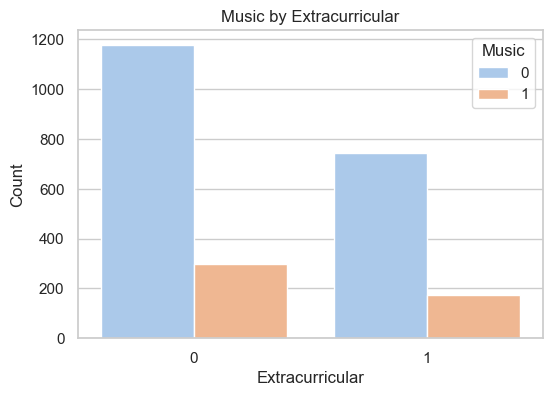


Chi-square test for Extracurricular vs Music: p-value = 0.5214
There's no significant association between Extracurricular and Music (p-value >= 0.05).


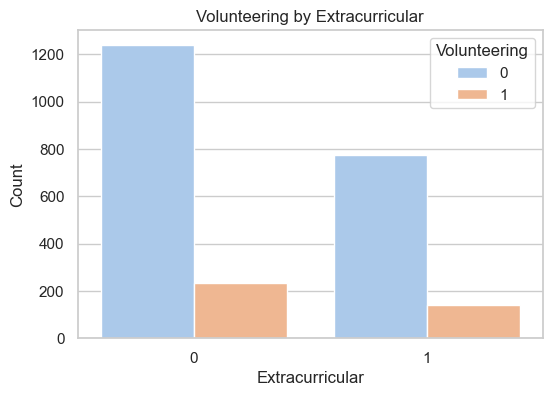


Chi-square test for Extracurricular vs Volunteering: p-value = 0.7600
There's no significant association between Extracurricular and Volunteering (p-value >= 0.05).


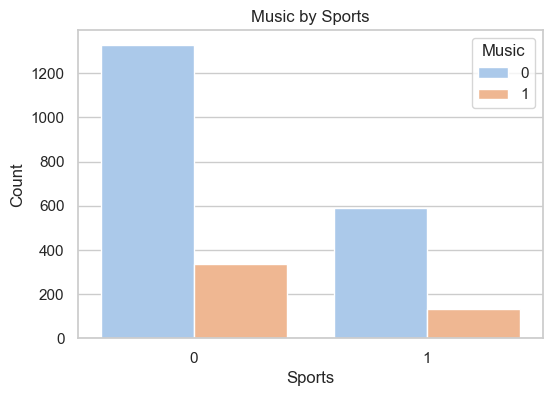


Chi-square test for Sports vs Music: p-value = 0.3444
There's no significant association between Sports and Music (p-value >= 0.05).


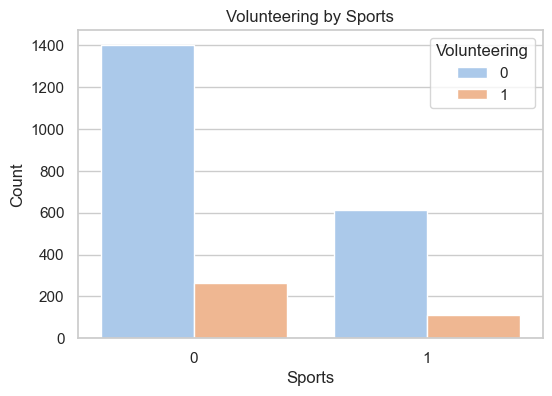


Chi-square test for Sports vs Volunteering: p-value = 0.9396
There's no significant association between Sports and Volunteering (p-value >= 0.05).


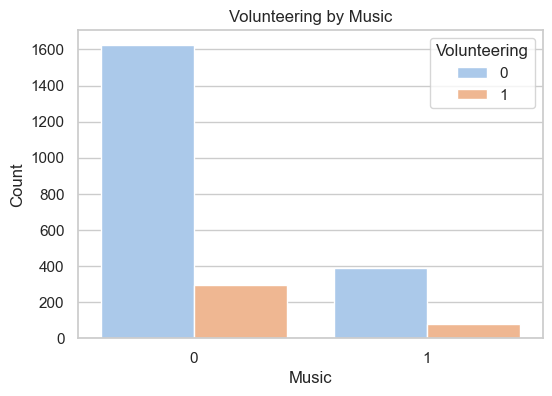


Chi-square test for Music vs Volunteering: p-value = 0.4403
There's no significant association between Music and Volunteering (p-value >= 0.05).


In [6]:
sns.set(style="whitegrid")

# ---------- NUMERICAL vs NUMERICAL ----------
# Correlation heatmap
plt.figure(figsize=(6, 4))
corr_matrix = df_original_cleaned[['StudyTimeWeekly', 'Absences', 'GradeClass']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Variables)')
plt.show()

# Interpretation of Correlation
print("\n--- Correlation Insights ---")
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        corr_value = corr_matrix.loc[row, col]
        if corr_value > 0.5:
            print(f"The correlation between {row} and {col} is strong positive ({corr_value:.2f}). This suggests a direct relationship between these two variables.")
        elif corr_value < -0.5:
            print(f"The correlation between {row} and {col} is strong negative ({corr_value:.2f}). This suggests an inverse relationship between these two variables.")
        elif 0.2 < corr_value <= 0.5:
            print(f"The correlation between {row} and {col} is moderate positive ({corr_value:.2f}). There's a moderate positive relationship between these variables.")
        elif -0.5 <= corr_value < -0.2:
            print(f"The correlation between {row} and {col} is moderate negative ({corr_value:.2f}). There's a moderate inverse relationship between these variables.")
        else:
            print(f"The correlation between {row} and {col} is weak ({corr_value:.2f}). There's a weak or no significant relationship between these variables.")

# Scatter plot: StudyTimeWeekly vs Absences
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_original_cleaned, x='StudyTimeWeekly', y='Absences', hue='GradeClass', palette='coolwarm')
plt.title('Study Time vs Absences (Colored by GradeClass)')
plt.xlabel('Study Time (Weekly)')
plt.ylabel('Absences')
plt.legend(title='GradeClass')
plt.show()

# Regression Plot: StudyTimeWeekly vs Absences (fit line)
plt.figure(figsize=(6, 4))
sns.regplot(data=df_original_cleaned, x='StudyTimeWeekly', y='Absences', scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Study Time vs Absences (Regression Line)')
plt.xlabel('Study Time (Weekly)')
plt.ylabel('Absences')
plt.show()

# ---------- NUMERICAL vs CATEGORICAL ----------
# Boxplots of numerical features across GradeClass
num_vars = ['StudyTimeWeekly', 'Absences']
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_original_cleaned, x='GradeClass', y=var, hue='GradeClass', palette='Set2', legend=False)
    plt.title(f'{var} by GradeClass')
    plt.xlabel('GradeClass')
    plt.ylabel(var)
    plt.show()

    # ANOVA Test to check if means of StudyTimeWeekly and Absences vary by GradeClass
    groups = [df_original_cleaned[df_original_cleaned['GradeClass'] == grade][var] for grade in df_original_cleaned['GradeClass'].unique()]
    stat, p_value = f_oneway(*groups)
    print(f"\nANOVA test for {var} by GradeClass: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"There's a significant difference in {var} across GradeClass categories (p-value < 0.05).")
    else:
        print(f"There's no significant difference in {var} across GradeClass categories (p-value >= 0.05).")

# ---------- CATEGORICAL vs CATEGORICAL ----------
# Define categorical pairs to explore
cat_vars = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 
            'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Crosstab plots against GradeClass
for cat in cat_vars:
    ct = pd.crosstab(df_original_cleaned[cat], df_original_cleaned['GradeClass'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(6, 4))
    plt.title(f'GradeClass Distribution by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Percentage')
    plt.legend(title='GradeClass')
    plt.show()

    # Chi-square Test for categorical feature vs GradeClass
    chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(df_original_cleaned[cat], df_original_cleaned['GradeClass']))
    print(f"\nChi-square test for {cat} vs GradeClass: p-value = {p_val:.4f}")
    if p_val < 0.05:
        print(f"There's a significant association between {cat} and GradeClass (p-value < 0.05).")
    else:
        print(f"There's no significant association between {cat} and GradeClass (p-value >= 0.05).")

# Additional pairwise categorical comparisons (optional deeper dive)
for i in range(len(cat_vars)):
    for j in range(i + 1, len(cat_vars)):
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df_original_cleaned, x=cat_vars[i], hue=cat_vars[j], palette='pastel')
        plt.title(f'{cat_vars[j]} by {cat_vars[i]}')
        plt.xlabel(cat_vars[i])
        plt.ylabel('Count')
        plt.legend(title=cat_vars[j])
        plt.show()

        # Chi-square Test for pairwise categorical comparison
        chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(df_original_cleaned[cat_vars[i]], df_original_cleaned[cat_vars[j]]))
        print(f"\nChi-square test for {cat_vars[i]} vs {cat_vars[j]}: p-value = {p_val:.4f}")
        if p_val < 0.05:
            print(f"There's a significant association between {cat_vars[i]} and {cat_vars[j]} (p-value < 0.05).")
        else:
            print(f"There's no significant association between {cat_vars[i]} and {cat_vars[j]} (p-value >= 0.05).")


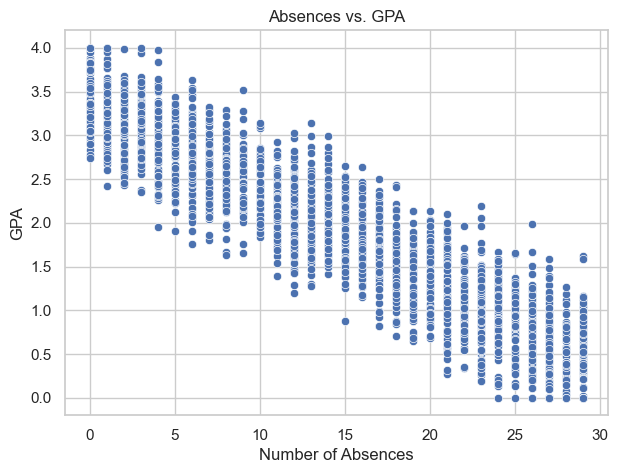

In [7]:
#Visualising the correlation between absences and GPA
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Absences', y='GPA', data=df_original_cleaned)
plt.title('Absences vs. GPA')
plt.xlabel('Number of Absences')
plt.ylabel('GPA')
plt.show()


### Bivariate Analysis Insights

#### **1. Numerical vs Numerical:**

- **Correlation Matrix:**
   - **StudyTimeWeekly** and **Absences**: There is a very weak correlation (0.01), suggesting that study time has almost no impact on student absences.
   - **StudyTimeWeekly** and **GradeClass**: The correlation is weak (-0.13), showing a slight inverse relationship, where more study time is weakly associated with lower grade classes.
   - **Absences** and **GradeClass**: The strong positive correlation (0.73) suggests that more absences are associated with lower grade classes.
  
  **Key Insight**: The negative impact of **absences** on grade performance is highly evident, while **study time** does not strongly correlate with performance. Improving **attendance** might have a more significant impact on **grades** than simply focusing on study hours.

- **Scatterplot - StudyTimeWeekly vs Absences:**
   - The scatter plot shows a broad distribution with no clear trend. This indicates that while there is no significant correlation, some students study more but still have a higher number of absences, highlighting the need for a deeper understanding of absenteeism.

#### **2. Numerical vs Categorical:**

- **Boxplots for StudyTimeWeekly and Absences by GradeClass:**
   - **StudyTimeWeekly by GradeClass**: The ANOVA test confirms a significant difference in study time across grade classes, though the relationship is not very strong. Higher grade classes tend to study more, with lower grade classes showing more variability in study time.
   - **Absences by GradeClass**: The boxplots show that students in higher grade classes generally have fewer absences. Lower grade classes exhibit more variability, reinforcing the need for interventions to reduce absenteeism in struggling students.

  **Key Insight**: Reducing **absenteeism** could significantly improve **academic performance**, and focusing on **study time** alone may not be as impactful. Addressing absenteeism for students in lower grade classes is particularly important.

#### **3. Categorical vs Categorical:**

- **Chi-Square Tests for Categorical Features by GradeClass:**
   - **Tutoring and GradeClass**: There is a significant association, indicating that students who receive tutoring are more likely to perform better academically.
   - **ParentalSupport and GradeClass**: A significant relationship suggests that students with more parental support tend to perform better in their grades.
   - **Extracurricular and GradeClass**: The significant association between extracurricular involvement and performance suggests that students who participate in extracurricular activities tend to have higher grades.
   
  **Key Insight**: **Tutoring**, **Parental Support**, and **Extracurricular Activities** have a strong positive influence on **academic performance**. Schools should focus on encouraging these factors, especially for students in lower grade categories.

- **Chi-Square Tests for Relationships Among Categorical Features:**
   - **ParentalEducation and Music**: A significant association indicates that students whose parents have higher education levels are more likely to participate in music activities.
   - **Tutoring and Volunteering**: A significant association suggests that students receiving tutoring are more likely to engage in volunteering, highlighting a positive, well-rounded approach to education.
   
  **Key Insight**: **Parental Education** influences a student’s involvement in **music** activities, and students in **tutoring programs** tend to be more involved in **volunteering**, suggesting that academic support also fosters broader social engagement.

#### **4. Key Takeaways:**
- **Absences**: **Absenteeism** is a major factor influencing **GradeClass**, and addressing it could significantly improve student performance.
- **StudyTimeWeekly**: While study time shows weak correlations with performance, it is still important to encourage more study time, particularly for students in lower grade classes.
- **Parental Support, Tutoring, and Extracurricular Activities**: These factors are consistently linked to better academic performance and should be prioritized in interventions.
- **Cultural or Socioeconomic Factors**: **Parental education** affects participation in activities like **music**, suggesting that family background plays a role in student engagement and performance.

### 6. Data Cleaning and Preprocessing

In [8]:
# Remove unnecessary columns
df_original_cleaned.drop(columns=['Ethnicity'], inplace=True)

# Check the result
print(df_original_cleaned.columns)

Index(['StudentID', 'Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')


In [9]:
# Check for missing values and duplicates
missing_values = df_original_cleaned.isnull().sum()
duplicates = df_original_cleaned[df_original_cleaned.duplicated()]

#Print missing values
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0].to_string())
else:
    print("No Missing Values Found")


# Print Duplicate Rows 
if duplicates.empty:
     print("No Duplicates Found")
else:
    print("Duplicates Found")
    print(duplicates)


No Missing Values Found
No Duplicates Found


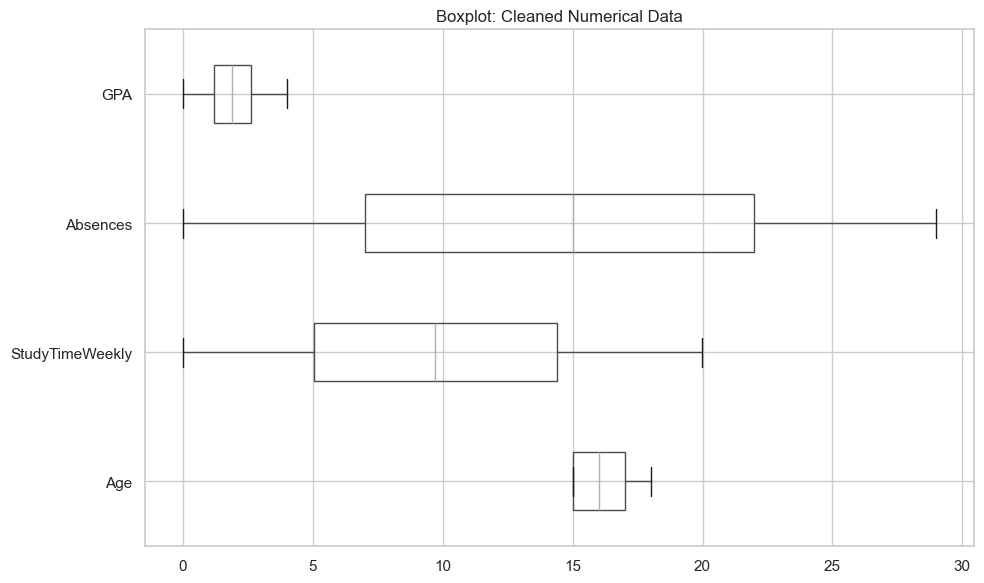

In [10]:
# Select only numerical (continuous) columns for the boxplot
numerical_columns =df_original_cleaned.select_dtypes(include=['float64', 'int64']).columns
# Drop encoded categorical columns
columns_to_exclude = ['Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass', 'StudentID']
relevant_columns = [col for col in numerical_columns if col not in columns_to_exclude]

# Boxplot for cleaned numerical data
fig, ax = plt.subplots(figsize=(10, 6))
df_original_cleaned[relevant_columns].boxplot(vert=0, ax=ax)
ax.set_title('Boxplot: Cleaned Numerical Data')
plt.tight_layout()
plt.show()


### 7. Feature Engineering

Create dataset copy for Feature Engineering

In [11]:
df_original_cleaned_FE = df_original_cleaned.copy() 

BrightPath Academy Problems: 
1. Delayed Student Risk Identification.
2. Determine student needs to create support structures.
3. Identify academic impact of extracurricular activities.
4. Can't use collected data to determine strategies.

Who are at risk students? 
A student who has a GPA below the class average can be considered a "at risk student".

In [12]:
average_gpa = df_original_cleaned_FE['GPA'].mean() #get the average GPA for the dataset
print("Average gpa :", average_gpa)

below_average_students = df_original_cleaned_FE[df_original_cleaned_FE['GPA'] < average_gpa]
print("Number of students below average GPA:", len(below_average_students))
below_average_student_ids = below_average_students['StudentID'].tolist()
print("IDs of students below average GPA:", below_average_student_ids)


Average gpa : 1.9061863027265407
Number of students below average GPA: 1206
IDs of students below average GPA: [1003, 1005, 1008, 1012, 1013, 1014, 1016, 1018, 1019, 1022, 1023, 1024, 1025, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1040, 1041, 1048, 1053, 1054, 1055, 1056, 1057, 1058, 1060, 1061, 1067, 1068, 1069, 1072, 1076, 1079, 1080, 1082, 1084, 1086, 1087, 1088, 1089, 1091, 1096, 1097, 1099, 1100, 1101, 1103, 1104, 1105, 1107, 1108, 1109, 1116, 1117, 1118, 1119, 1123, 1130, 1138, 1142, 1143, 1149, 1152, 1153, 1154, 1157, 1159, 1160, 1162, 1166, 1170, 1171, 1172, 1175, 1176, 1178, 1182, 1186, 1189, 1190, 1191, 1196, 1198, 1199, 1200, 1201, 1202, 1205, 1207, 1208, 1209, 1210, 1212, 1216, 1217, 1219, 1220, 1221, 1225, 1226, 1227, 1228, 1229, 1231, 1232, 1233, 1235, 1238, 1239, 1240, 1242, 1245, 1247, 1248, 1249, 1251, 1255, 1259, 1262, 1263, 1264, 1265, 1267, 1268, 1269, 1270, 1271, 1272, 1274, 1277, 1278, 1280, 1281, 1283, 1286, 1287, 1288, 1291, 1292, 1296, 1300, 1301, 

How do we determine a high risk student before their GPA is influenced? 
1. Determine factors that influence student performance.

In [13]:
df_original_cleaned_FE.head()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


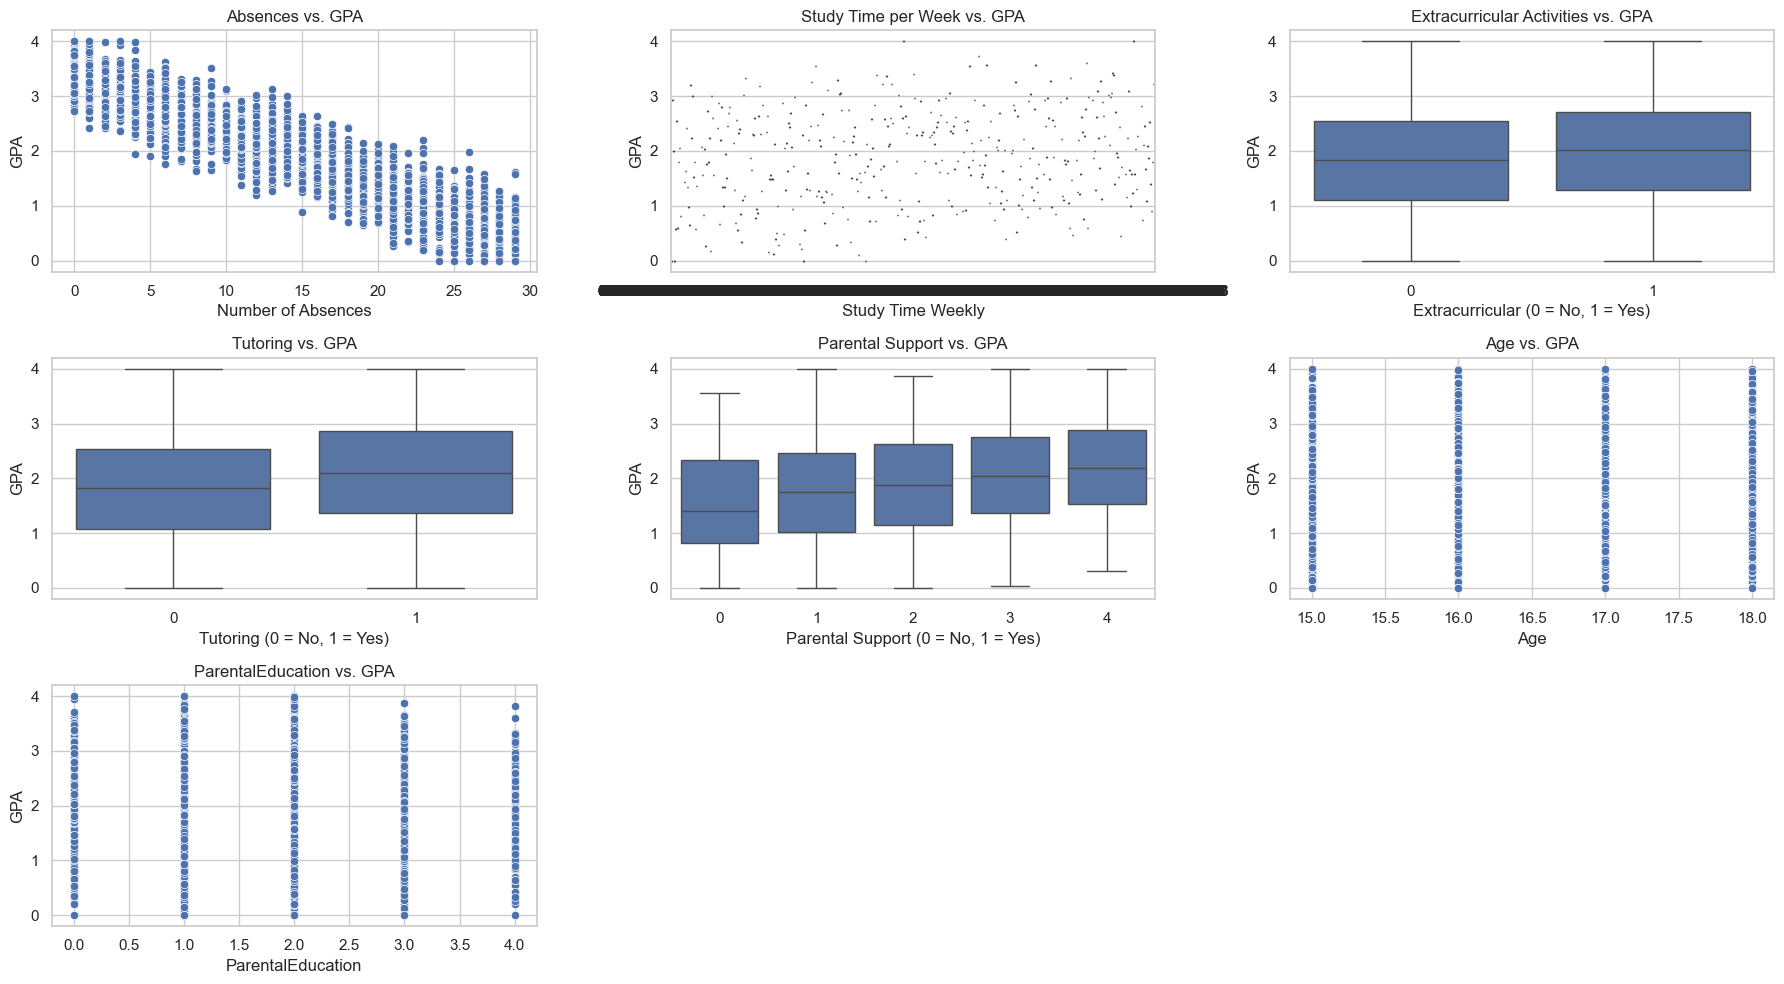

In [14]:
# (2 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten 2D array to make indexing easier

# Plot 1: Absences vs. GPA
sns.scatterplot(x='Absences', y='GPA', data=df_original_cleaned_FE, ax=axes[0])
axes[0].set_title('Absences vs. GPA')
axes[0].set_xlabel('Number of Absences')
axes[0].set_ylabel('GPA')

# Plot 2: Study Time vs. GPA
sns.boxplot(x='StudyTimeWeekly', y='GPA', data=df_original_cleaned_FE, ax=axes[1])
axes[1].set_title('Study Time per Week vs. GPA')
axes[1].set_xlabel('Study Time Weekly')
axes[1].set_ylabel('GPA')

# Plot 3: Extracurricular vs. GPA
sns.boxplot(x='Extracurricular', y='GPA', data=df_original_cleaned_FE, ax=axes[2])
axes[2].set_title('Extracurricular Activities vs. GPA')
axes[2].set_xlabel('Extracurricular (0 = No, 1 = Yes)')
axes[2].set_ylabel('GPA')

# Plot 4: Tutoring vs. GPA
sns.boxplot(x='Tutoring', y='GPA', data=df_original_cleaned_FE, ax=axes[3])
axes[3].set_title('Tutoring vs. GPA')
axes[3].set_xlabel('Tutoring (0 = No, 1 = Yes)')
axes[3].set_ylabel('GPA')

# Plot 5: Parental Support vs. GPA
sns.boxplot(x='ParentalSupport', y='GPA', data=df_original_cleaned_FE, ax=axes[4])
axes[4].set_title('Parental Support vs. GPA')
axes[4].set_xlabel('Parental Support (0 = No, 1 = Yes)')
axes[4].set_ylabel('GPA')

# Plot 6: Age vs. GPA (or any other interesting numeric column)
sns.scatterplot(x='Age', y='GPA', data=df_original_cleaned_FE, ax=axes[5])
axes[5].set_title('Age vs. GPA')
axes[5].set_xlabel('Age')
axes[5].set_ylabel('GPA')

# Plot 7: Parent Education vs. GPA (or any other interesting numeric column)
sns.scatterplot(x='ParentalEducation', y='GPA', data=df_original_cleaned_FE, ax=axes[6])
axes[6].set_title('ParentalEducation vs. GPA')
axes[6].set_xlabel('ParentalEducation')
axes[6].set_ylabel('GPA')

#Remove extra grpaphs
for i in range(7, len(axes)):
    fig.delaxes(axes[i])


# Layout adjustment
plt.tight_layout()
plt.show()


Risk Identification for student performance can be linked to:
1. Absence, students with high absence rates has a strong corelation to a low GPA
2. Tutoring, Students who are tutored perform better that students who are not tutored.
3. Parental support, Students with more parental support perform better than students with no parental support.
4. Extracurricular Activities, students who perform Extracurricular Activities has slightly higher GPAs.

Age, Study Time and parental education has little impact on gpa according to the data since the datapoints are evenly distributed.

At Risk Students column creation and other features:

In [15]:
df_original_cleaned_FE['SupportScore'] = (
    (df_original_cleaned_FE['ParentalSupport'] / 4) * 0.45 +
    (df_original_cleaned_FE['ParentalEducation'] / 4) * 0.1 +
    df_original_cleaned_FE['Tutoring'] * 0.45
)

average_gpa = df_original_cleaned_FE['GPA'].mean()
df_original_cleaned_FE['AtRisk'] = ((df_original_cleaned_FE['GPA'] < average_gpa) & 
                                    (df_original_cleaned_FE['Absences'] > 10) & 
                                    (df_original_cleaned_FE['SupportScore'] < 0.5)).astype(int)

def risk_category(row):
    if row['GPA'] < 2.5 and row['Absences'] > 15:
        return 'High Risk'
    elif row['GPA'] < 3.0 and row['Absences'] > 10:
        return 'Medium Risk'
    elif row['GPA'] < 3.3 and row['Absences'] > 5:
        return 'Low Risk'
    else:
        return 'No Risk'

df_original_cleaned_FE['RiskLevel'] = df_original_cleaned_FE.apply(risk_category, axis=1)

df_original_cleaned_FE['ActivityScore'] = (df_original_cleaned_FE['Sports'] + 
                                           df_original_cleaned_FE['Music'] + 
                                           df_original_cleaned_FE['Volunteering'] + 
                                           df_original_cleaned_FE['Extracurricular'])

df_original_cleaned_FE['Absence_StudyTime_Interaction'] = (df_original_cleaned_FE['Absences'] * 
                                                          df_original_cleaned_FE['StudyTimeWeekly'])
df_original_cleaned_FE['ParentalSupport_StudyTime'] = (df_original_cleaned_FE['ParentalSupport'] * 
                                                       df_original_cleaned_FE['StudyTimeWeekly'])

df_original_cleaned_FE['AbsenceBin'] = pd.cut(df_original_cleaned_FE['Absences'], 
                                              bins=[0, 5, 10, 15, 30], 
                                              labels=['Few', 'Moderate', 'Many', 'Excessive'])
df_original_cleaned_FE['StudyTimeBin'] = pd.cut(df_original_cleaned_FE['StudyTimeWeekly'], 
                                                bins=[0, 5, 10, 15, 20], 
                                                labels=['Minimal', 'Moderate', 'Substantial', 'Extensive'])

# New features to add
df_original_cleaned_FE['StudyTime_per_Absence'] = (df_original_cleaned_FE['StudyTimeWeekly'] / 
                                                   (df_original_cleaned_FE['Absences'] + 1))

df_original_cleaned_FE['Support_per_Activity'] = (df_original_cleaned_FE['SupportScore'] / 
                                                  (df_original_cleaned_FE['ActivityScore'] + 1))

df_original_cleaned_FE['Absences_squared'] = df_original_cleaned_FE['Absences'] ** 2

df_original_cleaned_FE['StudyTimeWeekly_squared'] = df_original_cleaned_FE['StudyTimeWeekly'] ** 2

df_original_cleaned_FE['Tutoring_StudyTime_Interaction'] = (df_original_cleaned_FE['Tutoring'] * 
                                                            df_original_cleaned_FE['StudyTimeWeekly'])

df_original_cleaned_FE['MultipleActivities'] = (df_original_cleaned_FE['ActivityScore'] > 1).astype(int)

# Display the updated DataFrame
df_original_cleaned_FE.head()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,...,Absence_StudyTime_Interaction,ParentalSupport_StudyTime,AbsenceBin,StudyTimeBin,StudyTime_per_Absence,Support_per_Activity,Absences_squared,StudyTimeWeekly_squared,Tutoring_StudyTime_Interaction,MultipleActivities
0,1001,17,1,2,19.833723,7,1,2,0,0,...,138.836060,39.667446,Moderate,Extensive,2.479215,0.36250,49,393.376560,19.833723,0
1,1002,18,0,1,15.408756,0,0,1,0,0,...,0.000000,15.408756,NaN,Extensive,15.408756,0.13750,0,237.429763,0.000000,0
2,1003,15,0,3,4.210570,26,0,2,0,0,...,109.474814,8.421140,Excessive,Minimal,0.155947,0.30000,676,17.728898,0.000000,0
3,1004,17,1,3,10.028829,14,0,3,1,0,...,140.403613,30.086488,Many,Substantial,0.668589,0.20625,196,100.577421,0.000000,0
4,1005,17,1,2,4.672495,17,1,3,0,0,...,79.432420,14.017486,Excessive,Minimal,0.259583,0.83750,289,21.832212,4.672495,0


In [16]:
## Check for NaN values : 
columns_to_check = [
    'StudentID', 'Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly',
    'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
    'GradeClass', 'SupportScore', 'AtRisk', 'RiskLevel',
    'ActivityScore', 'Absence_StudyTime_Interaction', 'ParentalSupport_StudyTime',
    'AbsenceBin', 'StudyTimeBin'
]

df_original_cleaned_FE[columns_to_check].isna().sum()

##Since there are only 67 nan values in AbsenceBin I will drop them since it won't affect the model much.
df_original_cleaned_FE = df_original_cleaned_FE.dropna(subset=['AbsenceBin'])



At-Risk Students: 833, GPA Mean: 1.08, Median: 1.12
Not At-Risk Students: 1492, GPA Mean: 2.30, Median: 2.37

Mean GPA by Risk Level:
RiskLevel
High Risk      1.127134
Low Risk       2.565019
Medium Risk    2.061344
No Risk        3.051231
Name: GPA, dtype: float64


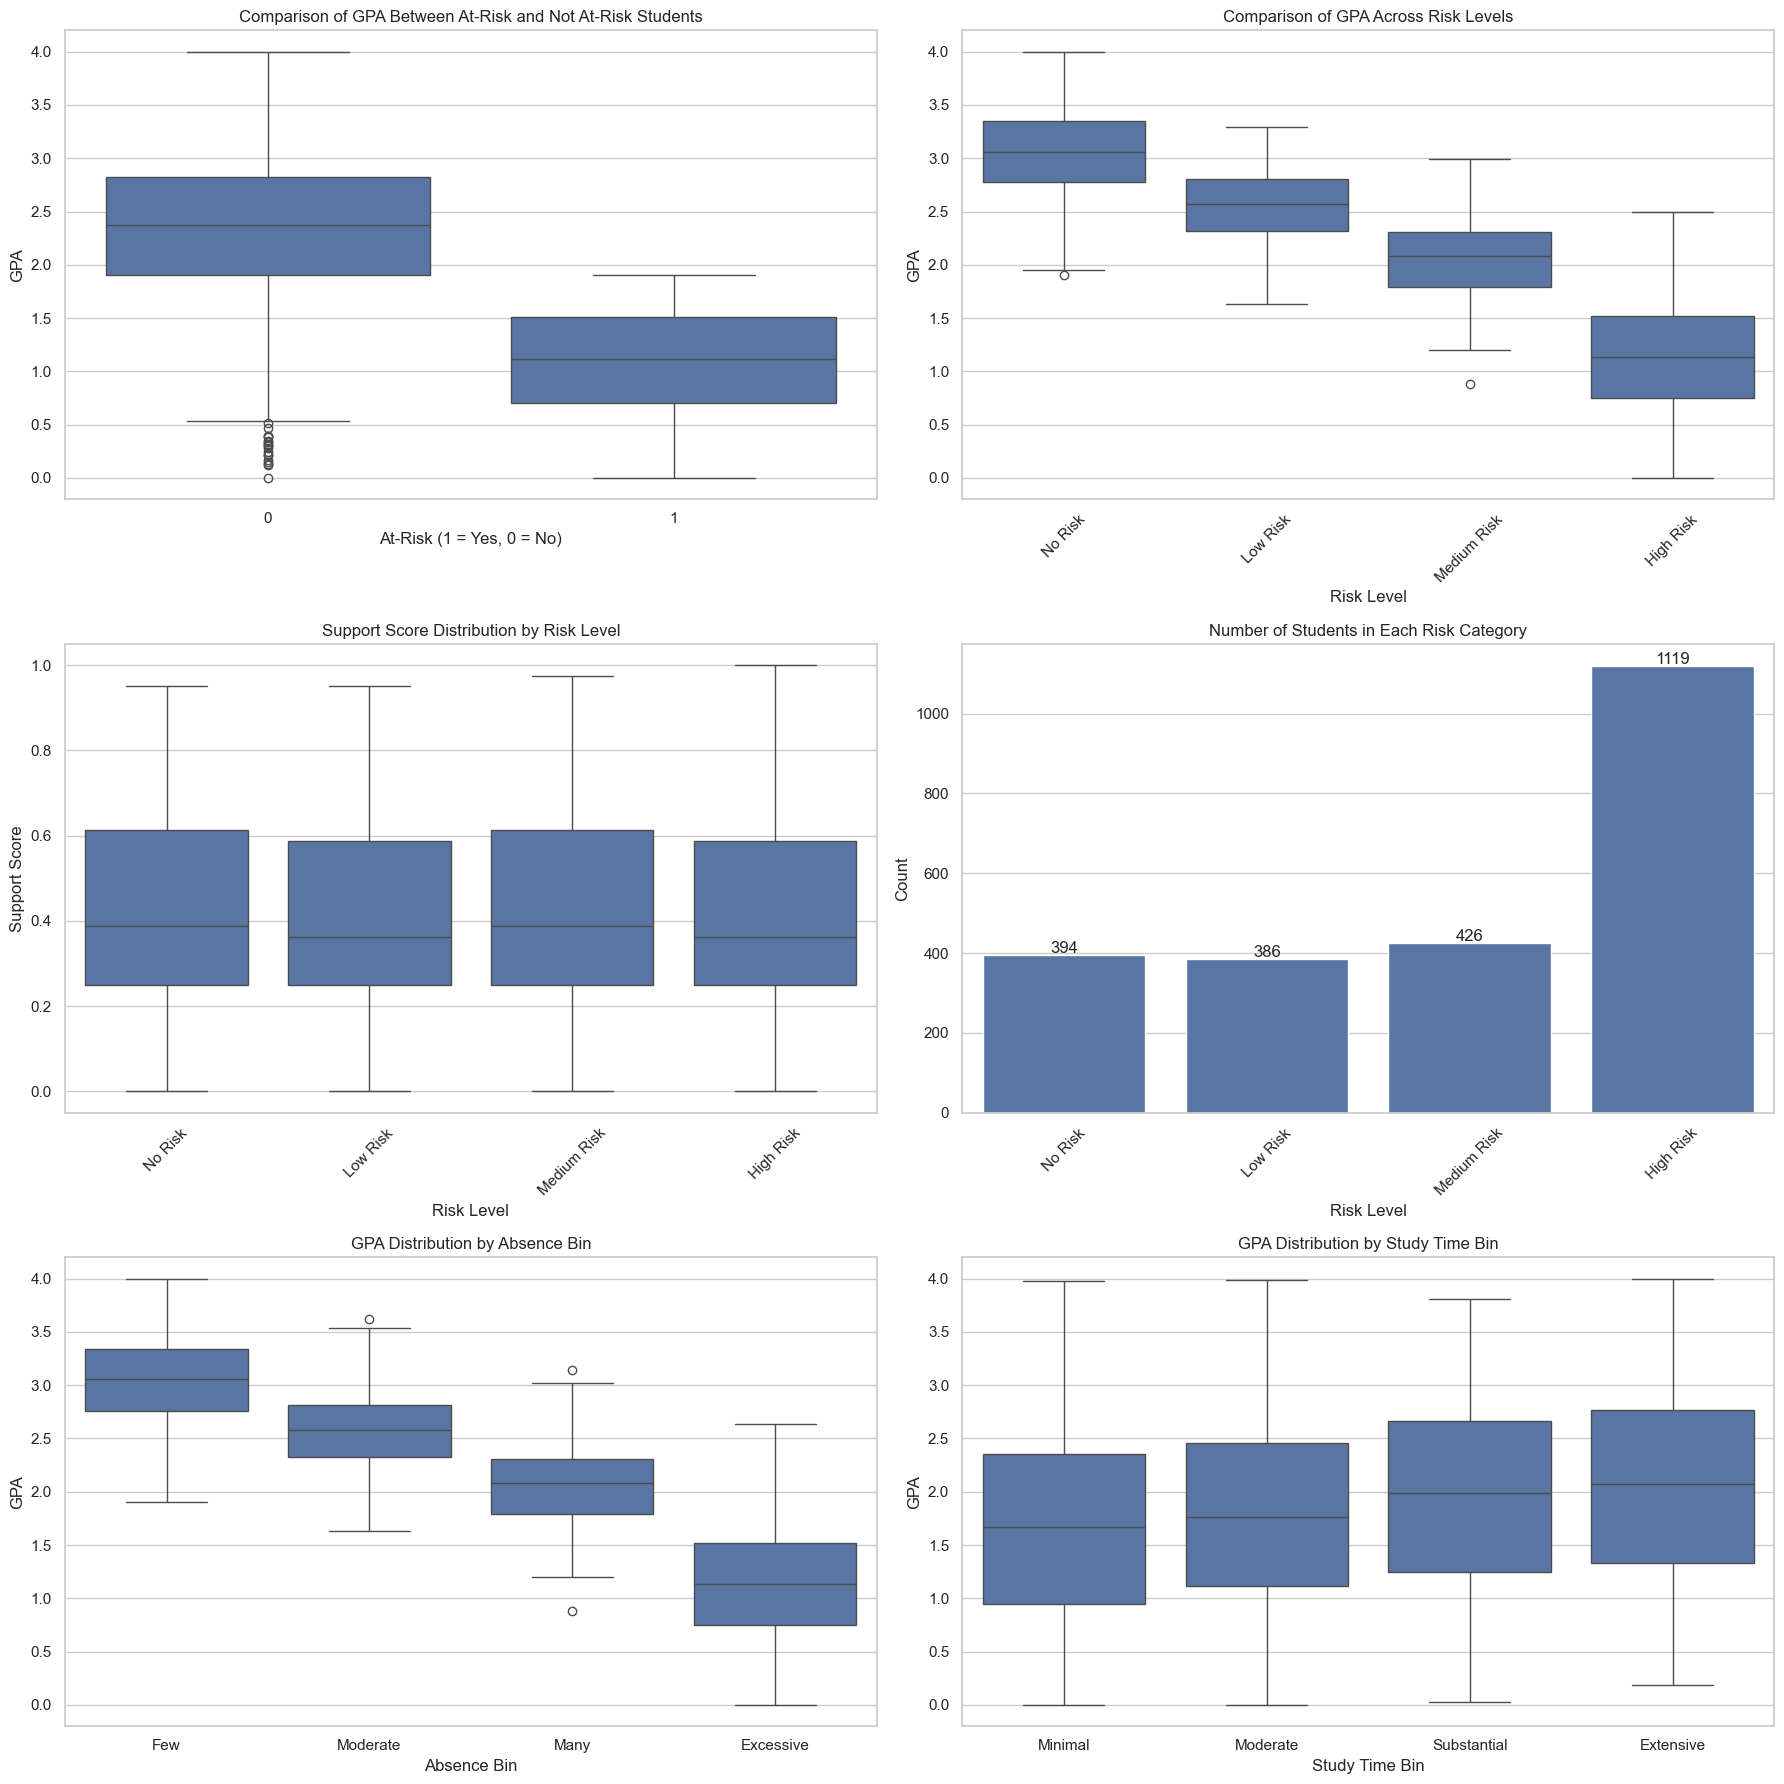

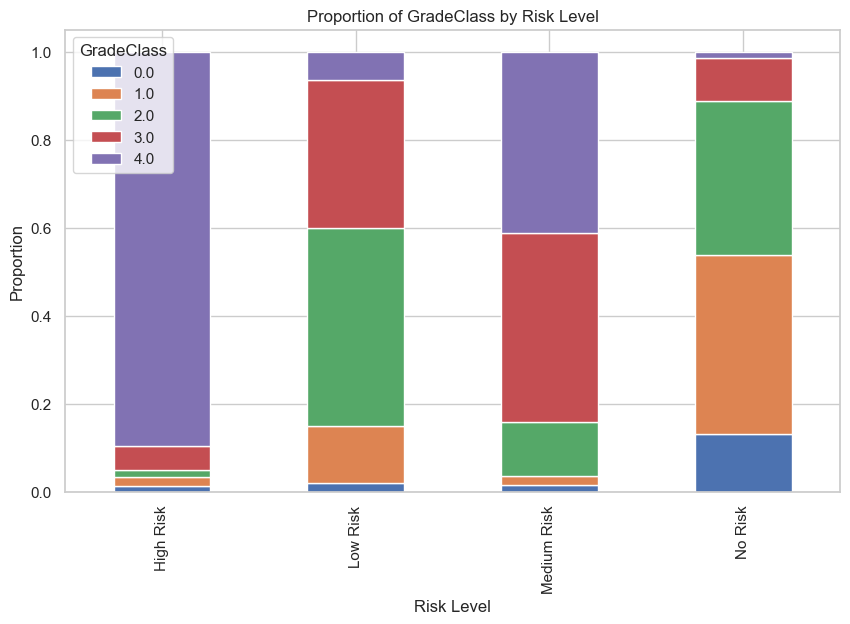

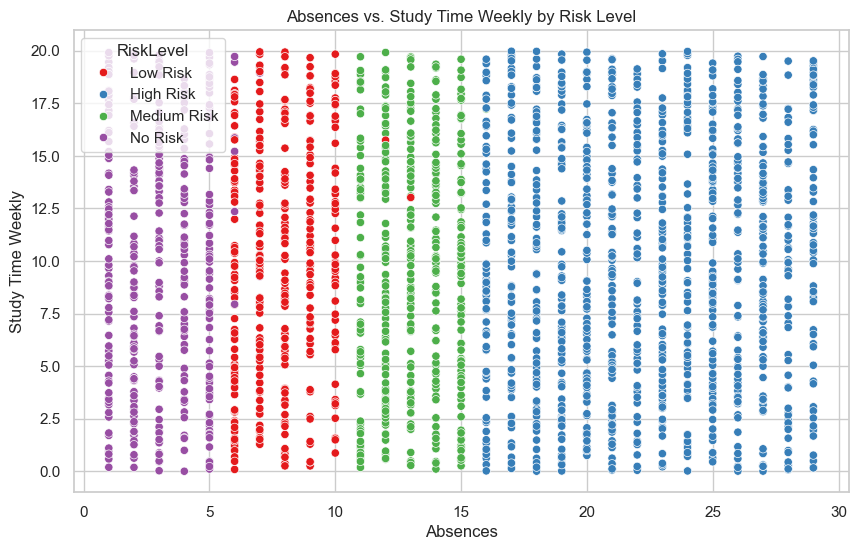

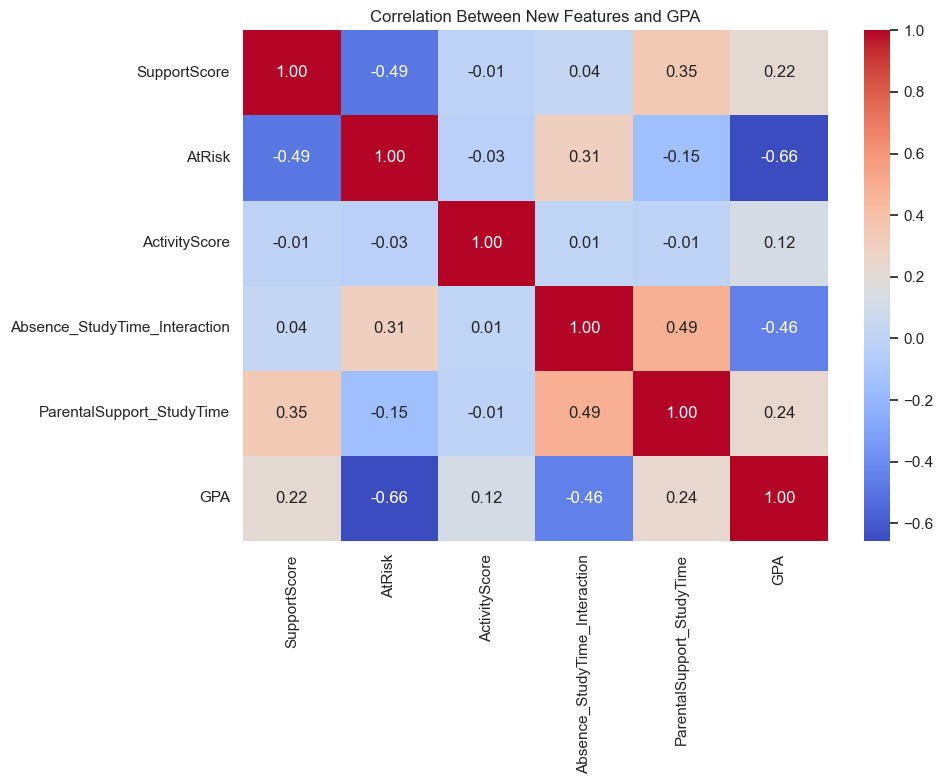

In [17]:

# **Calculate Statistics for At-Risk and Not At-Risk Students**
at_risk_gpa = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 1]['GPA'].mean()
not_at_risk_gpa = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 0]['GPA'].mean()
at_risk_gpa_median = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 1]['GPA'].median()
not_at_risk_gpa_median = df_original_cleaned_FE[df_original_cleaned_FE['AtRisk'] == 0]['GPA'].median()
at_risk_count = df_original_cleaned_FE['AtRisk'].sum()
not_at_risk_count = len(df_original_cleaned_FE) - at_risk_count

# Print enhanced statistics
print(f"At-Risk Students: {at_risk_count}, GPA Mean: {at_risk_gpa:.2f}, Median: {at_risk_gpa_median:.2f}")
print(f"Not At-Risk Students: {not_at_risk_count}, GPA Mean: {not_at_risk_gpa:.2f}, Median: {not_at_risk_gpa_median:.2f}")

# Calculate and print mean GPA by RiskLevel
risk_gpa_means = df_original_cleaned_FE.groupby('RiskLevel')['GPA'].mean()
print("\nMean GPA by Risk Level:")
print(risk_gpa_means)

# **Create a Figure with 3x2 Subplots**
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# 1. Boxplot: GPA between at-risk and not-at-risk students
sns.boxplot(x='AtRisk', y='GPA', data=df_original_cleaned_FE, ax=axes[0, 0])
axes[0, 0].set_title('Comparison of GPA Between At-Risk and Not At-Risk Students')
axes[0, 0].set_xlabel('At-Risk (1 = Yes, 0 = No)')
axes[0, 0].set_ylabel('GPA')

# 2. Boxplot: GPA across different risk levels
sns.boxplot(x='RiskLevel', y='GPA', data=df_original_cleaned_FE, ax=axes[0, 1], 
            order=['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'])
axes[0, 1].set_title('Comparison of GPA Across Risk Levels')
axes[0, 1].set_xlabel('Risk Level')
axes[0, 1].set_ylabel('GPA')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Support Score distribution by Risk Level
sns.boxplot(x='RiskLevel', y='SupportScore', data=df_original_cleaned_FE, ax=axes[1, 0], 
            order=['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'])
axes[1, 0].set_title('Support Score Distribution by Risk Level')
axes[1, 0].set_xlabel('Risk Level')
axes[1, 0].set_ylabel('Support Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Count of students in each risk category
risk_counts = df_original_cleaned_FE['RiskLevel'].value_counts().reindex(['No Risk', 'Low Risk', 'Medium Risk', 'High Risk'])
sns.barplot(x=risk_counts.index, y=risk_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Number of Students in Each Risk Category')
axes[1, 1].set_xlabel('Risk Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
for i in range(len(risk_counts)):
    axes[1, 1].text(i, risk_counts.values[i] + 5, str(risk_counts.values[i]), ha='center')

# 5. Boxplot: GPA by AbsenceBin
sns.boxplot(x='AbsenceBin', y='GPA', data=df_original_cleaned_FE, ax=axes[2, 0], 
            order=['Few', 'Moderate', 'Many', 'Excessive'])
axes[2, 0].set_title('GPA Distribution by Absence Bin')
axes[2, 0].set_xlabel('Absence Bin')
axes[2, 0].set_ylabel('GPA')

# 6. Boxplot: GPA by StudyTimeBin
sns.boxplot(x='StudyTimeBin', y='GPA', data=df_original_cleaned_FE, ax=axes[2, 1], 
            order=['Minimal', 'Moderate', 'Substantial', 'Extensive'])
axes[2, 1].set_title('GPA Distribution by Study Time Bin')
axes[2, 1].set_xlabel('Study Time Bin')
axes[2, 1].set_ylabel('GPA')

plt.tight_layout()
plt.show()

# **Stacked Bar Plot: GradeClass Distribution by RiskLevel**
grade_risk_ct = pd.crosstab(df_original_cleaned_FE['RiskLevel'], df_original_cleaned_FE['GradeClass'], normalize='index')
grade_risk_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of GradeClass by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Proportion')
plt.legend(title='GradeClass')
plt.show()

# **Scatter Plot: Absences vs. StudyTimeWeekly by RiskLevel**
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Absences', y='StudyTimeWeekly', hue='RiskLevel', data=df_original_cleaned_FE, palette='Set1')
plt.title('Absences vs. Study Time Weekly by Risk Level')
plt.xlabel('Absences')
plt.ylabel('Study Time Weekly')
plt.show()

# **Correlation Heatmap for New Features and GPA**
new_features = ['SupportScore', 'AtRisk', 'ActivityScore', 
                'Absence_StudyTime_Interaction', 'ParentalSupport_StudyTime']
correlation = df_original_cleaned_FE[new_features + ['GPA']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between New Features and GPA')
plt.tight_layout()
plt.show()

### 8. First Model Development


--- Tuning Logistic Regression ---
Best parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6989
Balanced Accuracy: 0.5668

Classification Report:
              precision    recall  f1-score   support

         0.0       0.12      0.31      0.18        16
         1.0       0.49      0.47      0.48        49
         2.0       0.65      0.47      0.55        76
         3.0       0.62      0.76      0.68        82
         4.0       0.90      0.82      0.86       242

    accuracy                           0.70       465
   macro avg       0.56      0.57      0.55       465
weighted avg       0.74      0.70      0.71       465


--- Tuning Random Forest ---
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced_subsample'}
Accuracy: 0.7527
Balanced Accuracy: 0.5827

Classification Report:
              precision    recall  f1-score   support

         0.0       0.29 

<Figure size 1400x800 with 0 Axes>

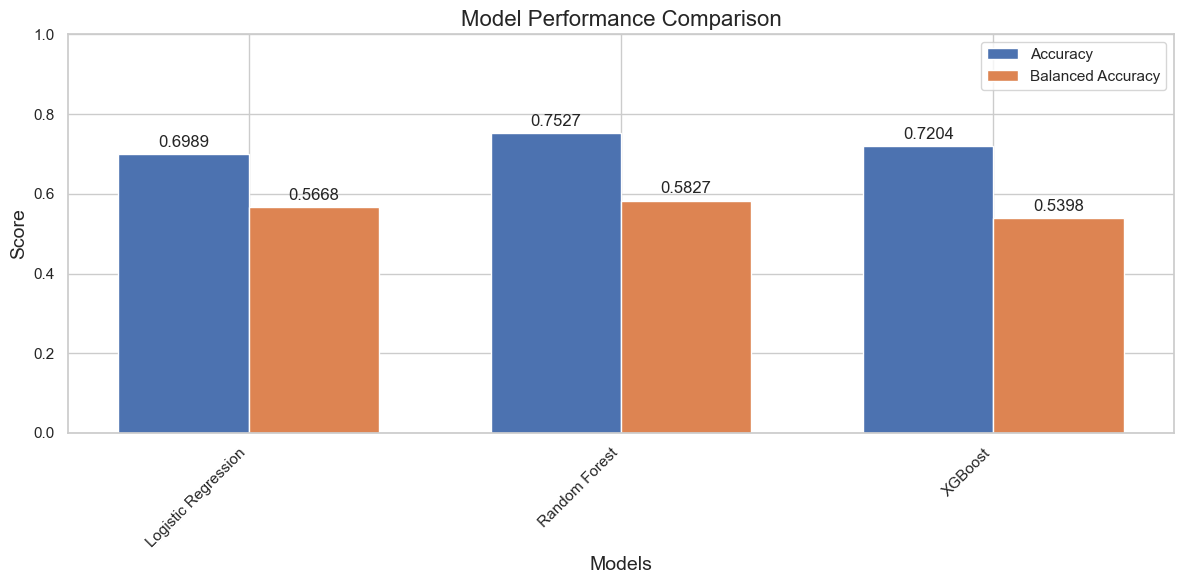


Best performing model: Random Forest with balanced accuracy: 0.5827


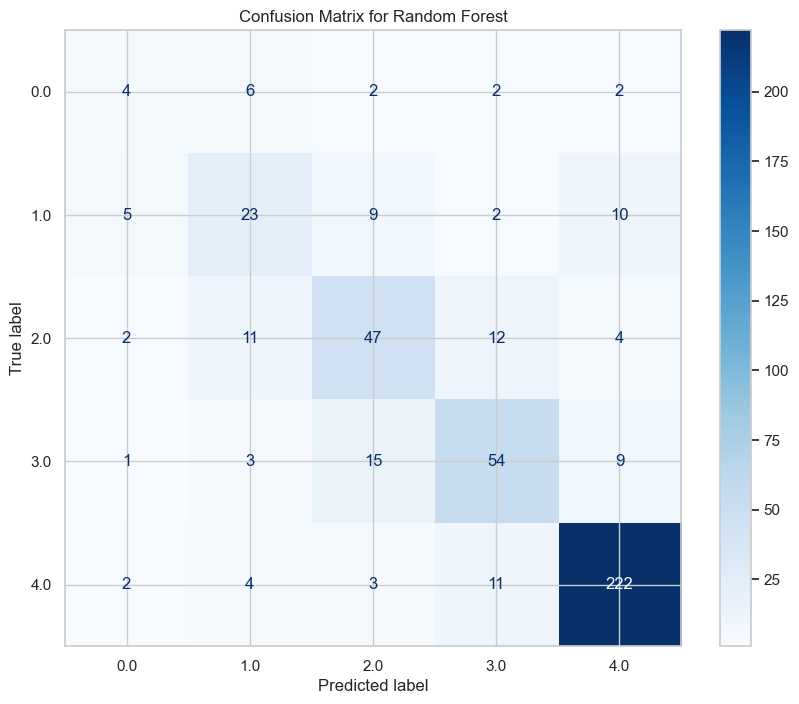

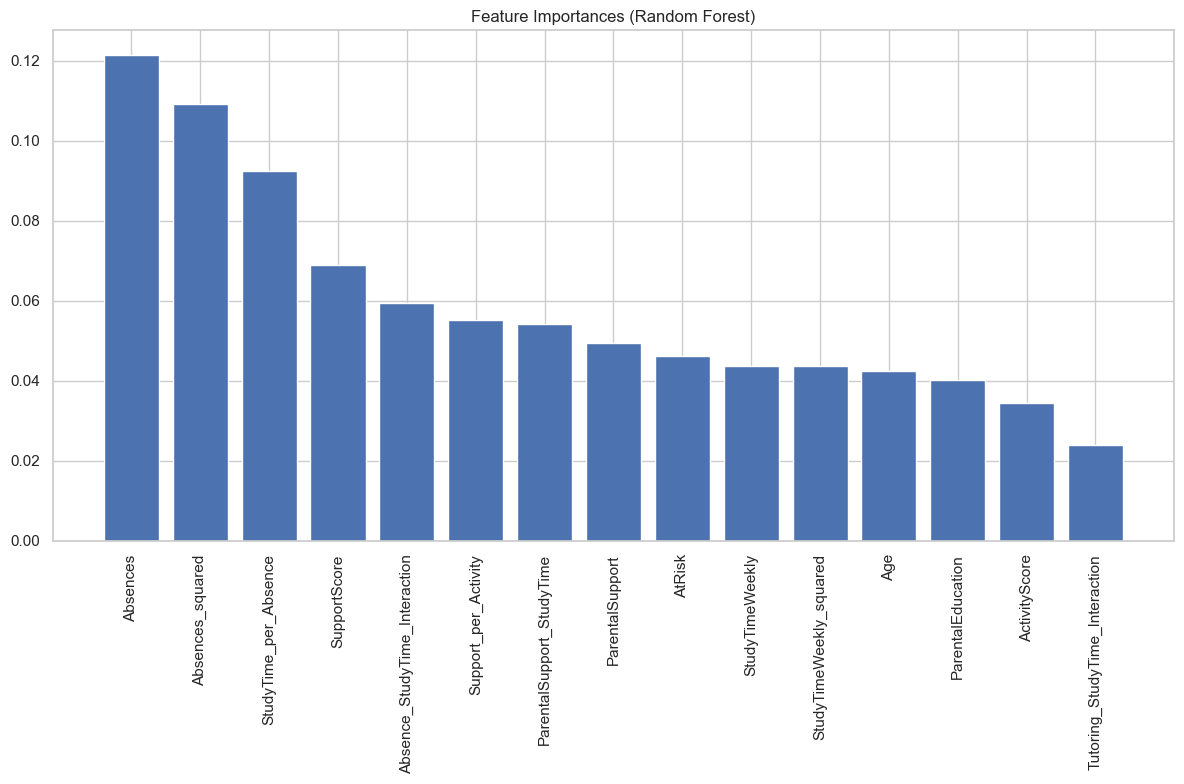

Random Forest model saved as 'best_model.pkl'


In [18]:
# Define features and target variable
X = df_original_cleaned_FE.drop(['GradeClass', 'GPA', 'StudentID'], axis=1)
y = df_original_cleaned_FE['GradeClass']

# Convert categorical RiskLevel to numerical for modeling
risk_level_encoded = pd.get_dummies(X['RiskLevel'], prefix='Risk')
X = pd.concat([X.drop('RiskLevel', axis=1), risk_level_encoded], axis=1)

# Handle other categorical columns
if 'AbsenceBin' in X.columns and 'StudyTimeBin' in X.columns:
    absence_bin_encoded = pd.get_dummies(X['AbsenceBin'], prefix='Absence')
    study_time_bin_encoded = pd.get_dummies(X['StudyTimeBin'], prefix='StudyTime')
    X = pd.concat([X.drop(['AbsenceBin', 'StudyTimeBin'], axis=1), 
                  absence_bin_encoded, study_time_bin_encoded], axis=1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, stratify=y)

# Select only numeric columns
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Apply Min-Max scaling to all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Dictionary to store model performances
model_performances = {}

# Model 1: Tuned Logistic Regression
print("\n--- Tuning Logistic Regression ---")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score

# Define parameter grid for Logistic Regression 
lr_valid_params = [
    {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs'], 'class_weight': ['balanced', None]},
    {'C': [0.1, 1, 10], 'penalty': [None], 'solver': ['lbfgs'], 'class_weight': ['balanced', None]}
]

# Grid search for Logistic Regression
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=80),
    lr_valid_params,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=80),  
    scoring='balanced_accuracy',
    n_jobs=-1
)
lr_grid.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters: {lr_grid.best_params_}")
lr_model = lr_grid.best_estimator_
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
model_performances['Logistic Regression'] = {'accuracy': lr_accuracy, 'balanced_accuracy': lr_balanced_accuracy}
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Balanced Accuracy: {lr_balanced_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Model 2: Tuned Random Forest using RandomizedSearchCV instead of GridSearchCV
print("\n--- Tuning Random Forest ---")
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Use RandomizedSearchCV instead of GridSearchCV for faster tuning
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=80),
    param_distributions=rf_param_grid,
    n_iter=15,  
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=80),  
    scoring='balanced_accuracy',
    n_jobs=-1,
    random_state=80
)
rf_random.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters: {rf_random.best_params_}")
rf_model = rf_random.best_estimator_
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
model_performances['Random Forest'] = {'accuracy': rf_accuracy, 'balanced_accuracy': rf_balanced_accuracy}
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Balanced Accuracy: {rf_balanced_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Model 3: Tuned XGBoost 
print("\n--- Tuning XGBoost ---")
import xgboost as xgb

# Define parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, sum(y_train == 4) / sum(y_train == 0)]
}

# Randomized search for XGBoost
xgb_random = RandomizedSearchCV(
    xgb.XGBClassifier(random_state=80, objective='multi:softmax', 
                     num_class=len(np.unique(y)), use_label_encoder=False, verbosity=0),
    param_distributions=xgb_param_grid,
    n_iter=20,  
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=80), 
    scoring='balanced_accuracy',
    n_jobs=-1,
    random_state=80
)
xgb_random.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters: {xgb_random.best_params_}")
xgb_model = xgb_random.best_estimator_
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
model_performances['XGBoost'] = {'accuracy': xgb_accuracy, 'balanced_accuracy': xgb_balanced_accuracy}
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Balanced Accuracy: {xgb_balanced_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# See performance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 8))
models = list(model_performances.keys())
accuracies = [model_performances[model]['accuracy'] for model in models]
balanced_accuracies = [model_performances[model]['balanced_accuracy'] for model in models]
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, balanced_accuracies, width, label='Balanced Accuracy')

ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1.0)

# Add values on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Find best model based on balanced accuracy
best_model_name = max(model_performances, key=lambda k: model_performances[k]['balanced_accuracy'])
print(f"\nBest performing model: {best_model_name} with balanced accuracy: {model_performances[best_model_name]['balanced_accuracy']:.4f}")

# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if best_model_name == 'Logistic Regression':
    best_y_pred = y_pred_lr
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_y_pred = y_pred_rf
    best_model = rf_model
else: 
    best_y_pred = y_pred_xgb
    best_model = xgb_model

cm = confusion_matrix(y_test, best_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title(f'Confusion Matrix for {best_model_name}')
plt.savefig('best_model_confusion_matrix.png')
plt.show()

# Feature importance for the best model
if best_model_name == 'Random Forest':
    feature_names = X_train_numeric.columns
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances (Random Forest)')
    plt.bar(range(min(15, len(indices))), importances[indices[:15]], color='b', align='center')
    plt.xticks(range(min(15, len(indices))), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.savefig('feature_importances.png')
    plt.show()
elif best_model_name == 'XGBoost':
    plt.figure(figsize=(12, 8))
    xgb.plot_importance(best_model, max_num_features=15)
    plt.title('Feature Importances (XGBoost)')
    plt.tight_layout()
    plt.savefig('xgb_feature_importances.png')
    plt.show()

# Saved model
best_model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': list(X.columns)
}

import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_data, f)
print(f"{best_model_name} model saved as 'best_model.pkl'")

### 9. Second Model Development

Dataframe copy

In [23]:
nn_df = df_original_cleaned.copy()
nn_df.drop(columns=["StudentID", "Age", "Gender", "GPA"], inplace=True)

Neural Network Feature Engineering

In [24]:
# Engagement Score (Sum of extracurricular activities)
nn_df['EngagementScore'] = nn_df[['Extracurricular', 'Volunteering', 'Sports', 'Music']].sum(axis=1)

# Engagement and Study Interaction (Using Engagement Score)
nn_df["EngagementStudyInteraction"] = nn_df["EngagementScore"] * nn_df["StudyTimeWeekly"]

# Engagement Support (Interaction between Engagement and Parental Support)
nn_df['EngagementSupport'] = nn_df['EngagementScore'] * nn_df['ParentalSupport']

# Tutoring and Absence Interaction
nn_df['TutoringAbsenceInteraction'] = nn_df['Tutoring'] * nn_df['Absences']

Developing the Model

In [ ]:
# Select relevant features and target
X = nn_df[['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular',
           'Sports', 'Music', 'Volunteering', 'EngagementScore', 'EngagementStudyInteraction',
           'EngagementSupport', 'TutoringAbsenceInteraction']]

y = nn_df['GradeClass']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'nn_scaler.pkl')

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Build the neural network
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax')) # 5 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping],
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/150


c:\Users\MC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3831 - loss: 1.5826 - val_accuracy: 0.5678 - val_loss: 1.3695
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 1.5077 - val_accuracy: 0.5616 - val_loss: 1.1859
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5696 - loss: 1.3614 - val_accuracy: 0.5846 - val_loss: 1.0681
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 1.2877 - val_accuracy: 0.6618 - val_loss: 0.9814
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5967 - loss: 1.2808 - val_accuracy: 0.6472 - val_loss: 0.9728
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6347 - loss: 1.1524 - val_accuracy: 0.6660 - val_loss: 0.9955
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 1.2014 - val_accuracy: 0.6681 - val_loss: 0.9758
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6493 - loss: 1.1459 - val_accuracy: 0.6848 - val_loss: 0.9

Evaluating the Model

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.7203

Classification Report:
              precision    recall  f1-score   support

         0.0       0.23      0.24      0.23        21
         1.0       0.60      0.44      0.51        54
         2.0       0.59      0.63      0.61        78
         3.0       0.52      0.70      0.60        83
         4.0       0.94      0.86      0.90       243

    accuracy                           0.72       479
   macro avg       0.58      0.57      0.57       479
weighted avg       0.74      0.72      0.73       479



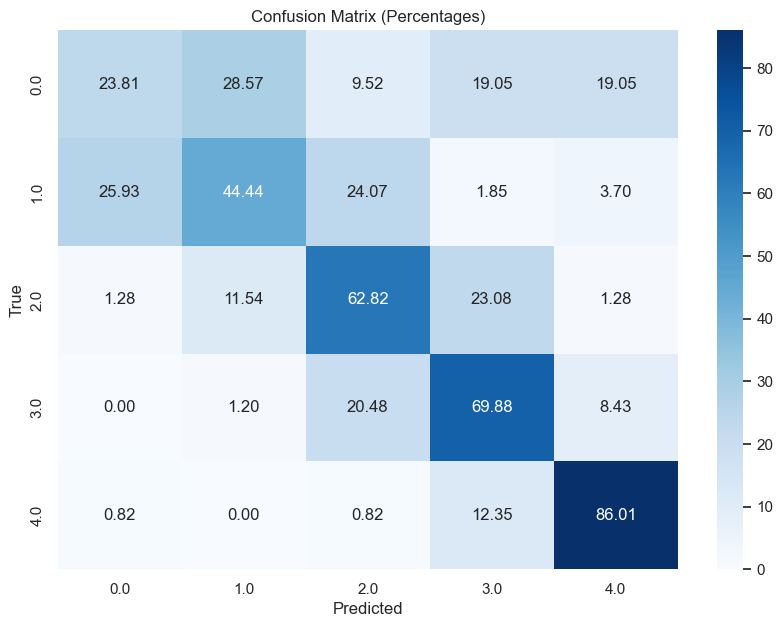

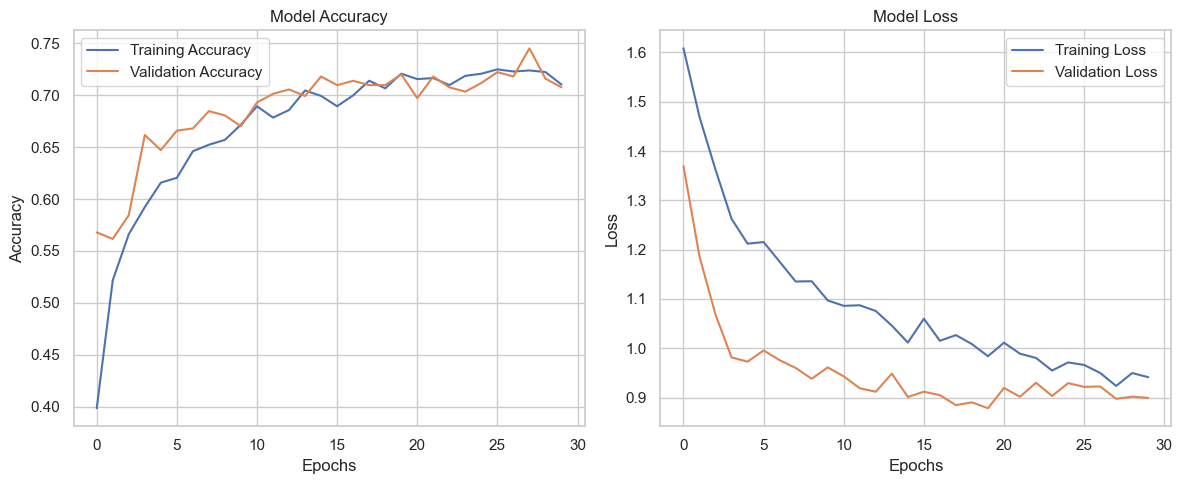

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Normalize the confusion matrix by row
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Class labels (ensure they are strings)
class_labels = [str(label) for label in np.unique(y)]

# Plot the Confusion Matrix (in percentages)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting training history (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Saving the Model

In [ ]:
# Save the model
# model.save('neural_network.keras')  # Saves the entire model

### 10. Comparison of Models

# Model Evaluation and Comparison

| **Model**           | **Accuracy** | **Balanced Accuracy** | **Class 4.0 Recall (Fail)** | **Class 3.0 Recall (Struggling)** |
|---------------------|--------------|-----------------------|----------------------------|----------------------------------|
| **Logistic Regression** | 69.89%      | 56.68%                | 0.31                       | 0.47                             |
| **Random Forest**    | 75.27%      | 58.27%                | 0.76                       | 0.66                             |
| **XGBoost**          | 72.04%      | 53.98%                | 0.91                       | 0.62                             |
| **Neural Network**   | 72.03%      | N/A                   | 0.86                       | 0.70                             |


### **Discussion**

The primary goal of this model is to predict students who are at risk, particularly those who might fail (class 4.0) or struggle significantly (class 3.0). In this context, the evaluation metrics—accuracy, balanced accuracy, and recall for the classes representing at-risk students (3.0 and 4.0)—are critical factors in determining the best model. Below is a breakdown of each model’s performance:

#### **Logistic Regression**
- **Strengths**: Logistic Regression provides reasonable accuracy (69.89%) and is generally efficient with relatively low computational requirements. It performs best for predicting students with high grades (class 0.0).
- **Weaknesses**: The model’s recall for class 4.0 (fail) is particularly low at just 31%, meaning it misses a significant number of students at risk of failing. The recall for class 3.0 (struggling) is also relatively low, indicating it is not particularly effective at identifying students who are in danger of poor performance.

#### **Random Forest**
- **Strengths**: Random Forest emerges as the best-performing model with the highest overall accuracy (75.27%) and balanced accuracy (58.27%). It performs exceptionally well for identifying students at risk of failing (class 4.0), with a recall of 76%. Additionally, it performs strongly for students in danger of struggling (class 3.0) with a recall of 66%. This makes it a very reliable choice for detecting at-risk students.
- **Weaknesses**: While the model performs well for the at-risk categories (3.0 and 4.0), it has lower precision in the lower classes, particularly for class 0.0 (A), which is typical for a model optimized for detecting outliers in the lower end.

#### **XGBoost**
- **Strengths**: XGBoost is highly effective for detecting students at risk of failing (class 4.0) with a recall of 91%, which is the highest among all models. It also performs reasonably well for class 3.0 with a recall of 62%.
- **Weaknesses**: Despite its strong performance for class 4.0, XGBoost shows lower balanced accuracy (53.98%) and overall recall for the struggling students (class 3.0). While it’s highly sensitive to detecting fail students, it could miss students who are at risk of struggling but not yet failing.

#### **Neural Network**
- **Strengths**: The Neural Network provides similar performance to XGBoost, with a strong recall for students at risk of failing (class 4.0) and those struggling (class 3.0), achieving recall rates of 86% and 70%, respectively.
- **Weaknesses**: While the Neural Network is competitive, it does not outperform Random Forest in terms of balanced accuracy or overall classification performance. Additionally, the complexity of training neural networks means it can require more computational resources.



### **Recommendation**

Based on the evaluation results, **Random Forest** is the best model for predicting at-risk students. This model not only delivers the highest accuracy (75.27%) but also demonstrates the best balanced accuracy (58.27%), making it effective at identifying students who are likely to fail (class 4.0) and those who are struggling (class 3.0). The strong recall for these critical classes indicates that Random Forest is more capable of identifying students in need of intervention compared to other models.

- **Why Random Forest?**
    - **High Recall for Fail and Struggling Students**: Random Forest's recall for class 4.0 (76%) and class 3.0 (66%) ensures that it successfully identifies the students most at risk of failing or underperforming, which aligns directly with the goal of the model.
    - **Balanced Performance**: Compared to other models, Random Forest provides a good balance between accuracy and recall, ensuring it does not overly favor any class, especially the non-risk classes (e.g., class 0.0, A).
    - **Robustness**: It performs consistently across all classes, with an advantage in identifying students who need attention before they fail.

While XGBoost and Neural Networks also perform well, particularly for class 4.0, they tend to sacrifice performance for students who are struggling (class 3.0) and may miss students who aren't at immediate risk of failure but are still important to identify. Therefore, **Random Forest** stands out as the most effective and balanced model for this task.

### 11. Web Application